<a href="https://colab.research.google.com/github/niall-anthony-mcnulty/Diabetes-Classification-Ensemble/blob/main/Diabetes_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Packages

In [6]:
# EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn as sk
import pprint
# Math
from scipy.stats import loguniform
# Pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
# Metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, recall_score, classification_report, matthews_corrcoef
# Scaling
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
# Processing Data
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score, RandomizedSearchCV, PredefinedSplit
from sklearn.model_selection import PredefinedSplit
# Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
# Neural Nets
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from collections import Counter
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.callbacks import EarlyStopping
# Counter
from collections import Counter
from collections import defaultdict
# Colab
from google.colab import files
# Resample
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
# Save
import joblib
import pickle
# Additional
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import make_scorer
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from scipy.stats import zscore
from scipy.stats import zscore


# 2. Title 

## Does Random Forest Feature Engineering Provide Better Predictive Power for Deteting Diabetes?

> Primary research question: Will random forest feature engineering help improve the results of a LogisticRegression, Naives Bayes and ANN classifier in predicting diabetes?<br><br>
> Secondary research question: Does sampling improve the performance of the models?



In [2]:
# mount drive
from google.colab import drive
drive.mount('/drive')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [7]:
# direction path 
images_dir = '/drive/My Drive/Colab Notebooks/CDC Diabetes Images/'

In [8]:
# direction path 
main_dir = '/drive/My Drive/Colab Notebooks/CDC Diabetes/'

In [9]:

# load dataset from Google Drive
df = pd.read_csv('/drive/My Drive/Colab Notebooks/CDC Diabetes/diabetes_binary_health_indicators_BRFSS2015.csv')

# 3. About Data

## Context
>Diabetes is among the most prevalent chronic diseases in the United States, impacting millions of Americans each year and exerting a significant financial burden on the economy. Diabetes is a serious chronic disease in which individuals lose the ability to effectively regulate levels of glucose in the blood, and can lead to reduced quality of life and life expectancy. After different foods are broken down into sugars during digestion, the sugars are then released into the bloodstream. This signals the pancreas to release insulin. Insulin helps enable cells within the body to use those sugars in the bloodstream for energy. Diabetes is generally characterized by either the body not making enough insulin or being unable to use the insulin that is made as effectively as needed.

>Complications like heart disease, vision loss, lower-limb amputation, and kidney disease are associated with chronically high levels of sugar remaining in the bloodstream for those with diabetes. While there is no cure for diabetes, strategies like losing weight, eating healthily, being active, and receiving medical treatments can mitigate the harms of this disease in many patients. Early diagnosis can lead to lifestyle changes and more effective treatment, making predictive models for diabetes risk important tools for public and public health officials.

>The scale of this problem is also important to recognize. The Centers for Disease Control and Prevention has indicated that as of 2018, 34.2 million Americans have diabetes and 88 million have prediabetes. Furthermore, the CDC estimates that 1 in 5 diabetics, and roughly 8 in 10 prediabetics are unaware of their risk. While there are different types of diabetes, type II diabetes is the most common form and its prevalence varies by age, education, income, location, race, and other social determinants of health. Much of the burden of the disease falls on those of lower socioeconomic status as well. Diabetes also places a massive burden on the economy, with diagnosed diabetes costs of roughly USD 327 billion  and total costs with undiagnosed diabetes and prediabetes approaching USD 400 billion annually.

## Content
>The Behavioral Risk Factor Surveillance System (BRFSS) is a health-related telephone survey that is collected annually by the CDC. Each year, the survey collects responses from over 400,000 Americans on health-related risk behaviors, chronic health conditions, and the use of preventative services. It has been conducted every year since 1984. For this project, a csv of the dataset available on Kaggle for the year 2015 was used. This original dataset contains responses from 441,455 individuals and has 330 features. These features are either questions directly asked of participants, or calculated variables based on individual participant responses.

##Dataset:
>diabetes _ binary _ health _ indicators _ BRFSS2015.csv is a clean dataset of 253,680 survey responses to the CDC's BRFSS2015. The target variable Diabetes_binary has 2 classes. 0 is for no diabetes, and 1 is for prediabetes or diabetes. This dataset has 21 feature variables and is not balanced.


## Acknowledgements:
>It it important to reiterate that I did not create this dataset. Alex Teboul cleaned and and consolidated the dataset ('https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset?select=diabetes_binary_health_indicators_BRFSS2015.csv') ALREADY created from the BRFSS 2015 on Kaggle. Original source for the dataset can be found at 'https://www.kaggle.com/cdc/behavioral-risk-factor-surveillance-system'. The codebook can also be found at 'https://www.cdc.gov/brfss/annual_data/2015/pdf/codebook15_llcp.pdf'





# 3. Preprocessing

In [10]:
df.head(3)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0


In [11]:
# checking for the number of missing values in the dataset
df.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [12]:
# Handling missing values
# removing the rows having missing values

df.dropna(inplace = True )

In [13]:
# Checking for duplicate rows 

duplicate = df[df.duplicated()]
print("Duplicate Rows : ", len(duplicate))
duplicate

Duplicate Rows :  24206


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
1242,1.0,1.0,1.0,1.0,27.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,0.0,30.0,1.0,0.0,10.0,4.0,5.0
1563,0.0,0.0,0.0,1.0,21.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,6.0,8.0
2700,0.0,0.0,0.0,1.0,32.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,5.0,6.0,8.0
3160,0.0,0.0,0.0,1.0,21.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,6.0,8.0
3332,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,9.0,6.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253492,1.0,1.0,1.0,1.0,33.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,9.0,6.0,6.0
253550,0.0,0.0,0.0,1.0,25.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,7.0,6.0,8.0
253563,0.0,0.0,1.0,1.0,24.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,6.0,8.0
253597,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,5.0,6.0,8.0


####<i><font color=#ffff99>In the case of duplicate rows, I do not believe they are duplicates of individual people. Given the nature of the survey, it is probable that multiple respondants can give exact answers. Therefor this data is still representitive of the sample. It should not be deleted. </i></font>


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [15]:
df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [16]:
#transform data
df['Diabetes_binary'] = df['Diabetes_binary'].astype('int')
df['HighBP'] = df['HighBP'].astype('int')
df['HighChol'] = df['HighChol'].astype('int')
df['CholCheck'] = df['CholCheck'].astype('int')
df['BMI'] = df['BMI'].astype('int')
df['Smoker'] = df['Smoker'].astype('int')
df['Stroke'] = df['Stroke'].astype('int')
df['HeartDiseaseorAttack'] = df['HeartDiseaseorAttack'].astype('int')
df['PhysActivity'] = df['PhysActivity'].astype('int')
df['Fruits'] = df['Fruits'].astype('int')
df['Veggies'] = df['Veggies'].astype('int')
df['HvyAlcoholConsump'] = df['HvyAlcoholConsump'].astype('int')
df['AnyHealthcare'] = df['AnyHealthcare'].astype('int')
df['NoDocbcCost'] = df['NoDocbcCost'].astype('int')
df['GenHlth'] = df['GenHlth'].astype('int')
df['MentHlth'] = df['MentHlth'].astype('int')
df['PhysHlth'] = df['PhysHlth'].astype('int')
df['DiffWalk'] = df['DiffWalk'].astype('int')
df['Sex'] = df['Sex'].astype('int')
df['Age'] = df['Age'].astype('int')
df['Education'] = df['Education'].astype('int')
df['Income'] = df['Income'].astype('int')
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4


In [17]:
# define features and target
X = df.drop('Diabetes_binary', axis=1)
y = df['Diabetes_binary']


In [18]:
print(X.isnull().sum())

HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


# 4. EDA

In [19]:
df_eda = df.copy()

## a. Confusion Matrix Function

In [20]:
# #@title
# %%script echo skipping
# illustrate with a confusion matrix test
def confusion_matrix_plot(cfm,flxt,title):

    sns.set(rc = {'figure.figsize':(5,5)})
    ax = sns.heatmap(cfm, annot=True, cmap='Blues', fmt='g')
    ax.set_title(f"Confusion Matrix for {title}\n\n");
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

    # ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['True','False'])
    ax.yaxis.set_ticklabels(['True','False'])

    # save
    plt.savefig(f"{images_dir}/confusion-matrix-{flxt}.png")
    
    # display the visualization of the Confusion Matrix.
    
    return plt.show()

## b. HeatMap

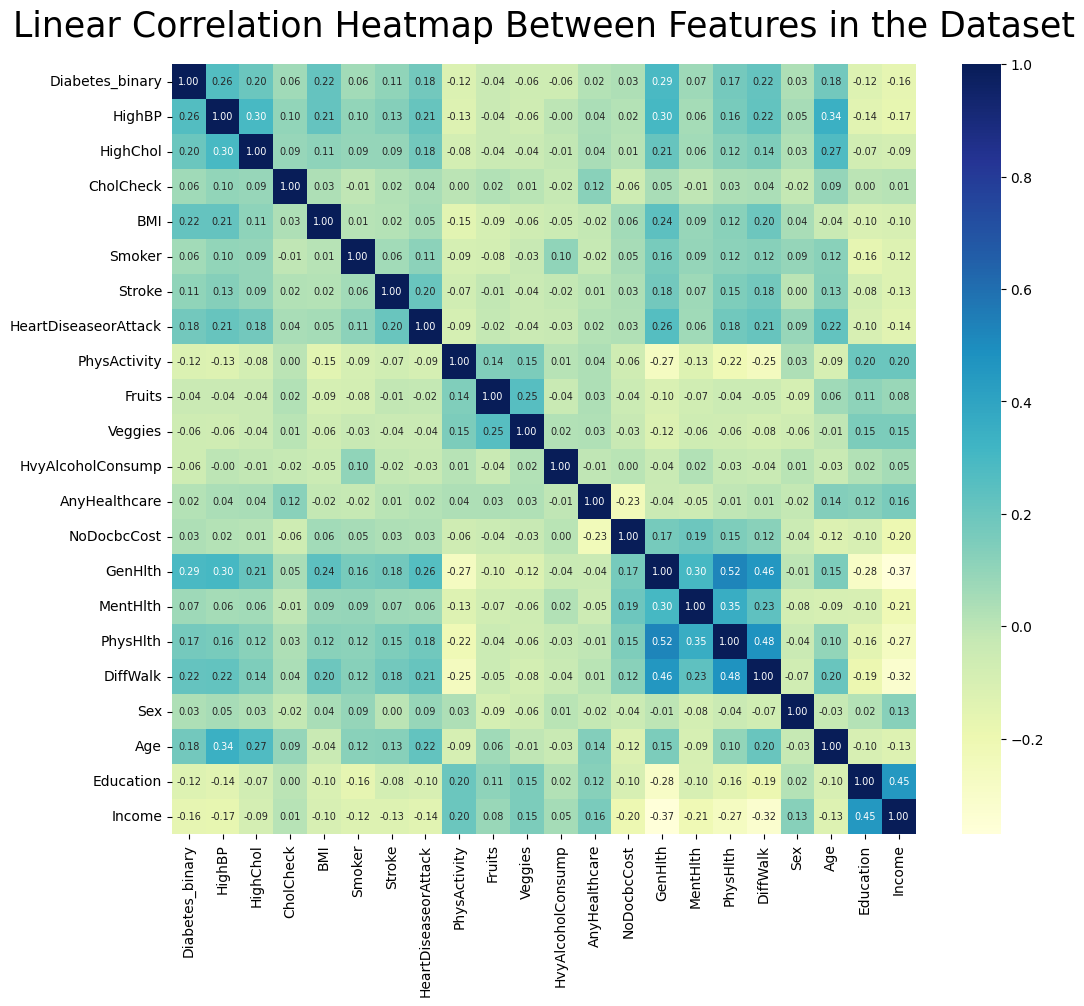

In [21]:
# # #@title
# # %%script echo skipping

plt.figure(figsize=(12, 10))
ax = plt.axes()
sns.heatmap(df_eda.corr(), ax=ax, cmap='YlGnBu', annot=True, annot_kws={"size": 7}, fmt='.2f')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
sns.set(rc={'figure.figsize': (20, 8)})
ax.set_title('Linear Correlation Heatmap Between Features in the Dataset', fontsize= 25, pad=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.savefig(f'{images_dir}/feature-correlation-heatmap.png', dpi=300, bbox_inches='tight')

## c. Bar Graph Correlation

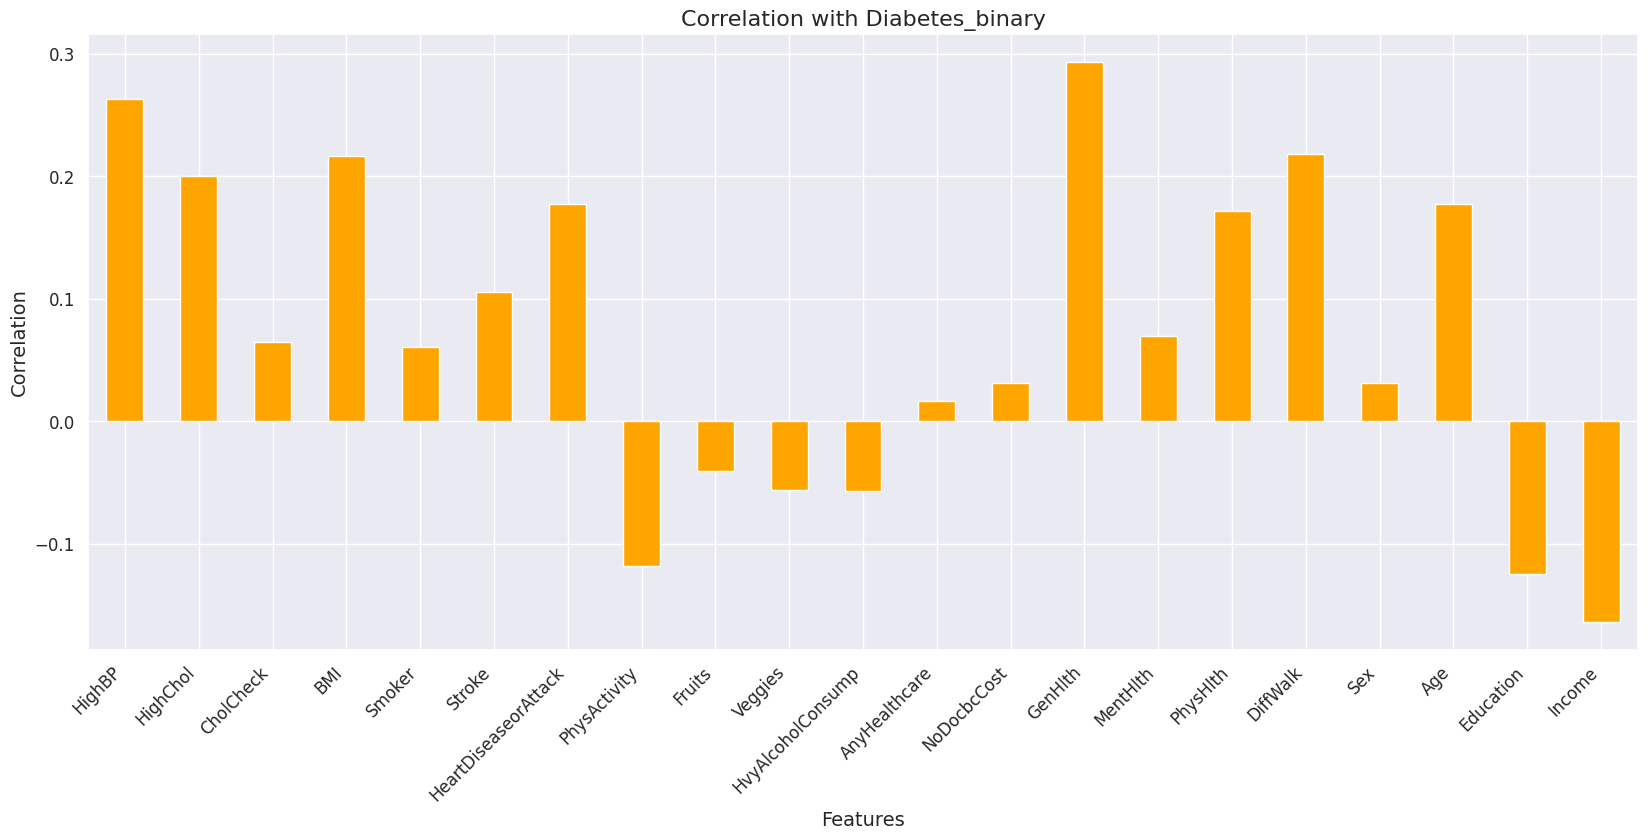

In [22]:
# correlation with Diabetes_binary through bar graph
plt.figure(figsize=(20, 8))
df_eda.drop('Diabetes_binary', axis=1).corrwith(df_eda.Diabetes_binary).plot(kind='bar', grid=True, color="Orange")
plt.title("Correlation with Diabetes_binary", fontsize=16)
plt.xlabel("Features", fontsize=14)
plt.ylabel("Correlation", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.savefig(f'{images_dir}/barcorr.png', dpi=300, bbox_inches='tight')

## d. Histogram (Distributions)

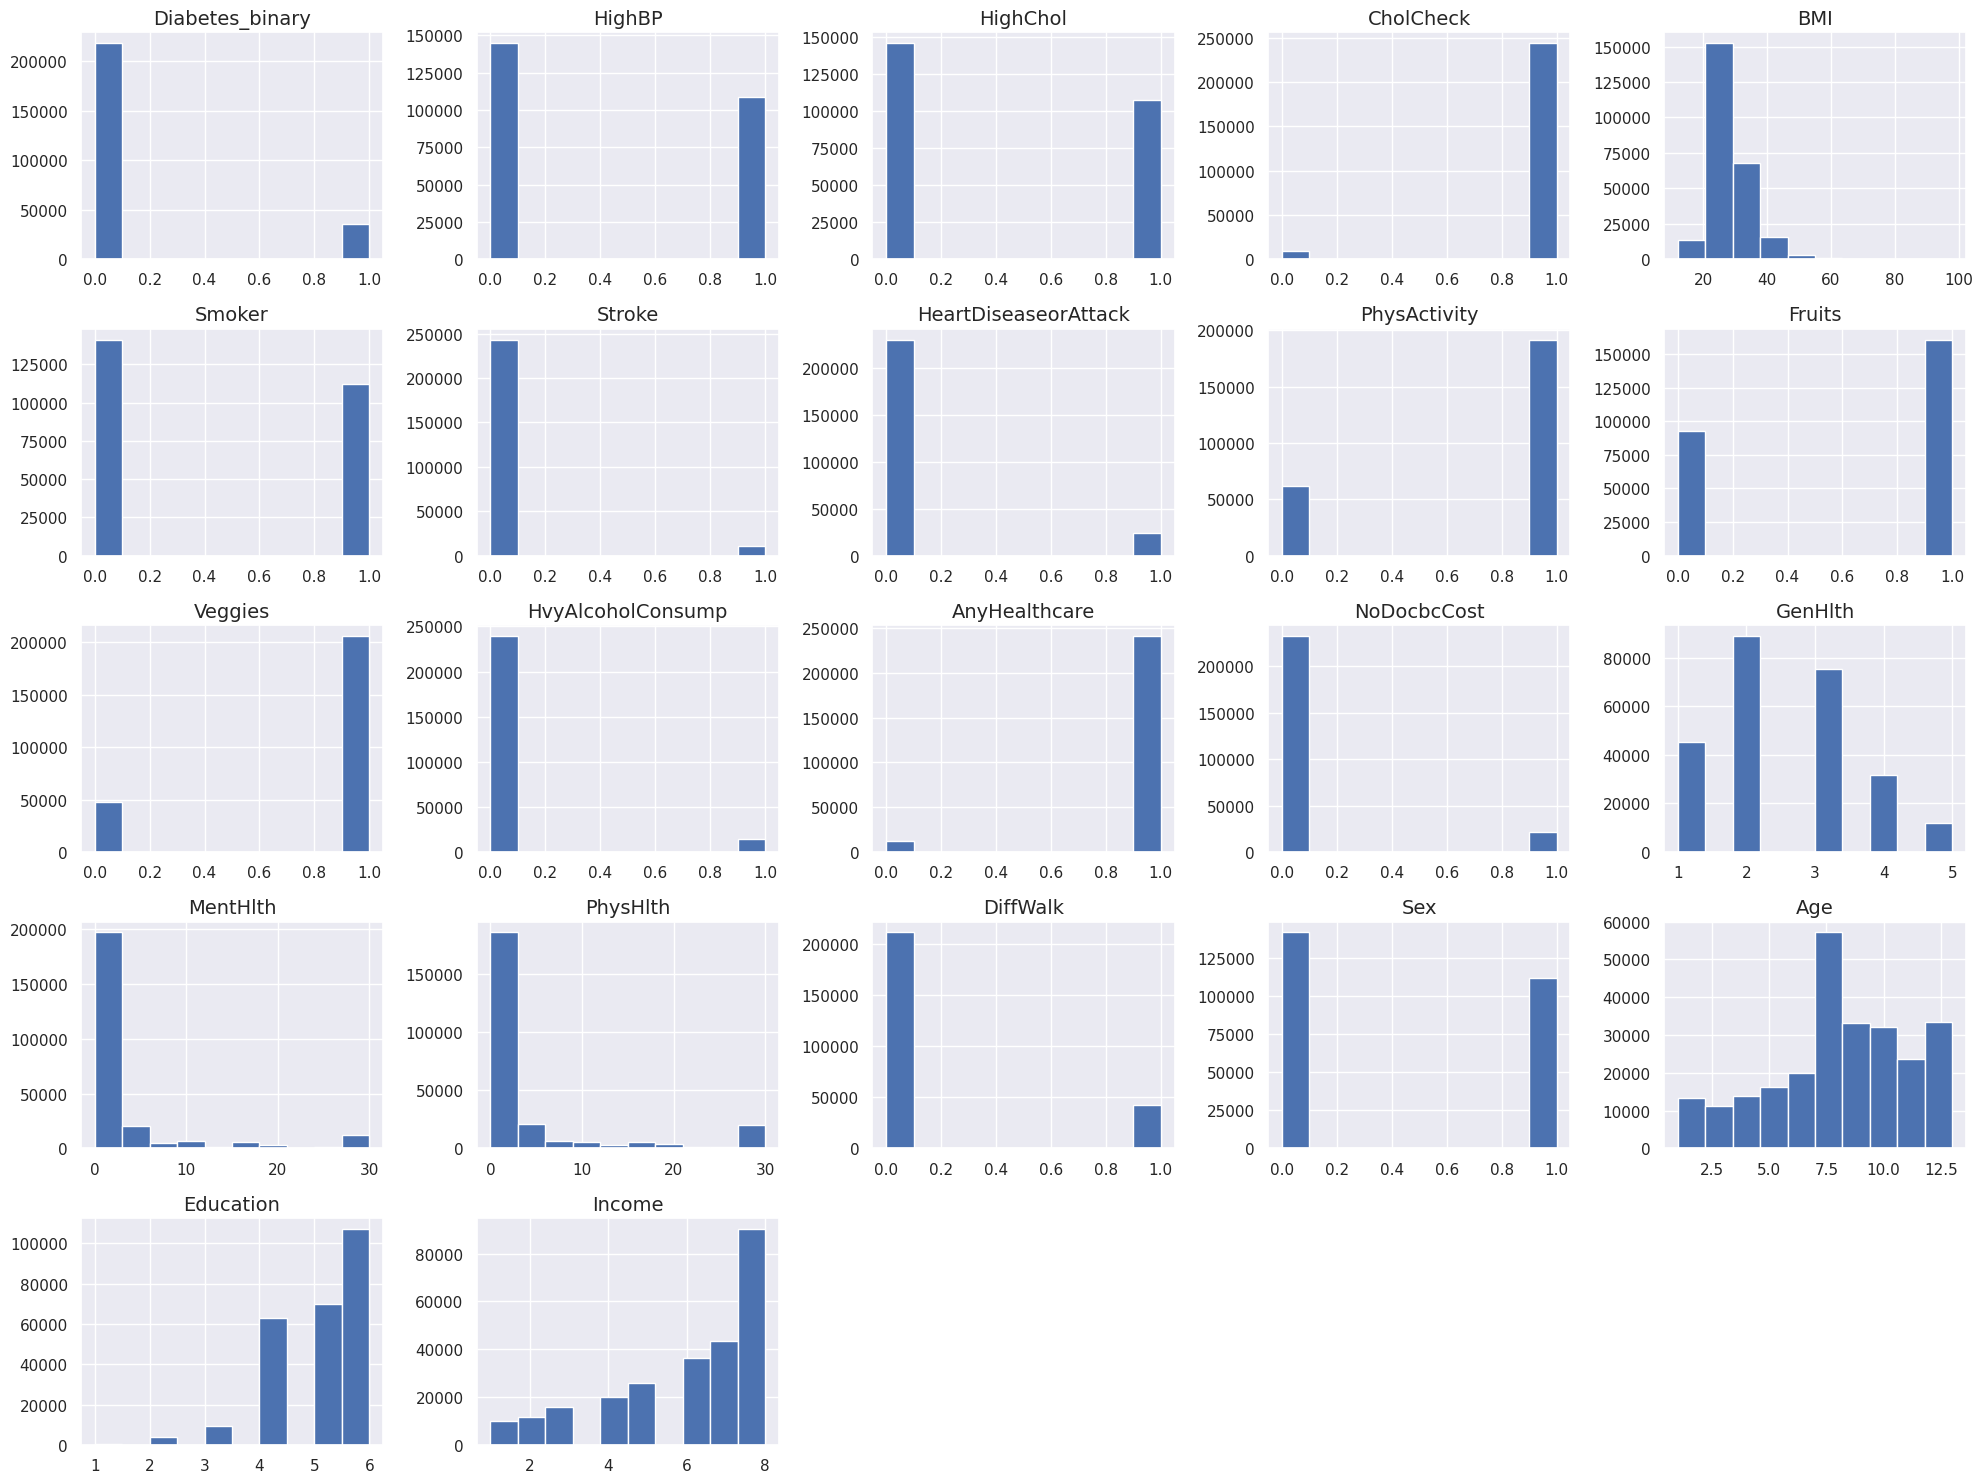

In [23]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20,15))

# flatten the axes to a 1D array
axes = axes.flatten()

# loop over the subplots and plot the histograms
for i, col in enumerate(df_eda.columns):
    df_eda[col].hist(ax=axes[i])
    axes[i].set_title(col, fontsize=14)

    
# remove the last three subplots
for ax in axes[22:25]:
    ax.remove()

# adjust the spacing between subplots
plt.tight_layout()

# save the figure
plt.savefig(f'{images_dir}/histogram.png', dpi=300, bbox_inches='tight')

## e. Count of Diabetes vs. Non Diabetes

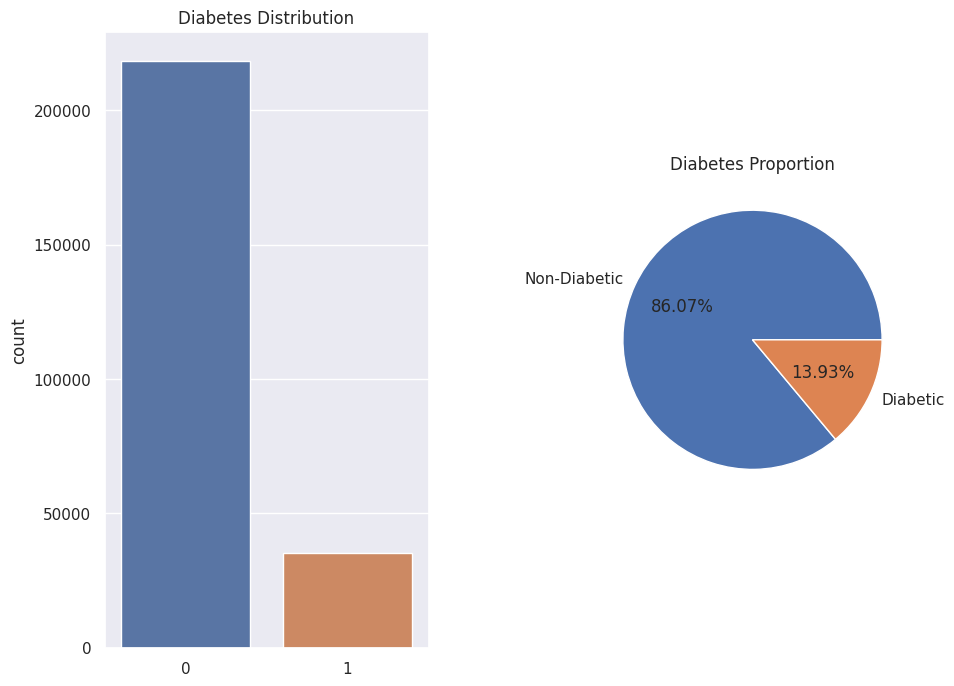

In [24]:
#checking the value count of Diabetes_binary by using countplot

figure1, plot1 = plt.subplots(1, 2, figsize=(12, 8))

sns.countplot(data=df_eda, x='Diabetes_binary', ax=plot1[0])
plot1[0].set_title("Diabetes Distribution")
plot1[0].set_xlabel("")

labels = ["Non-Diabetic", "Diabetic"]
sizes = df_eda["Diabetes_binary"].value_counts()
plot1[1].pie(sizes, labels=labels, autopct='%.2f%%')
plot1[1].set_title("Diabetes Proportion")

figure1.subplots_adjust(wspace=0.5, right=0.8) # adjust the spacing between subplots and the right margin
figure1.savefig(f'{images_dir}/diabetes_count.png', dpi=300, bbox_inches='tight')

## f. Outliers Using Boxplots

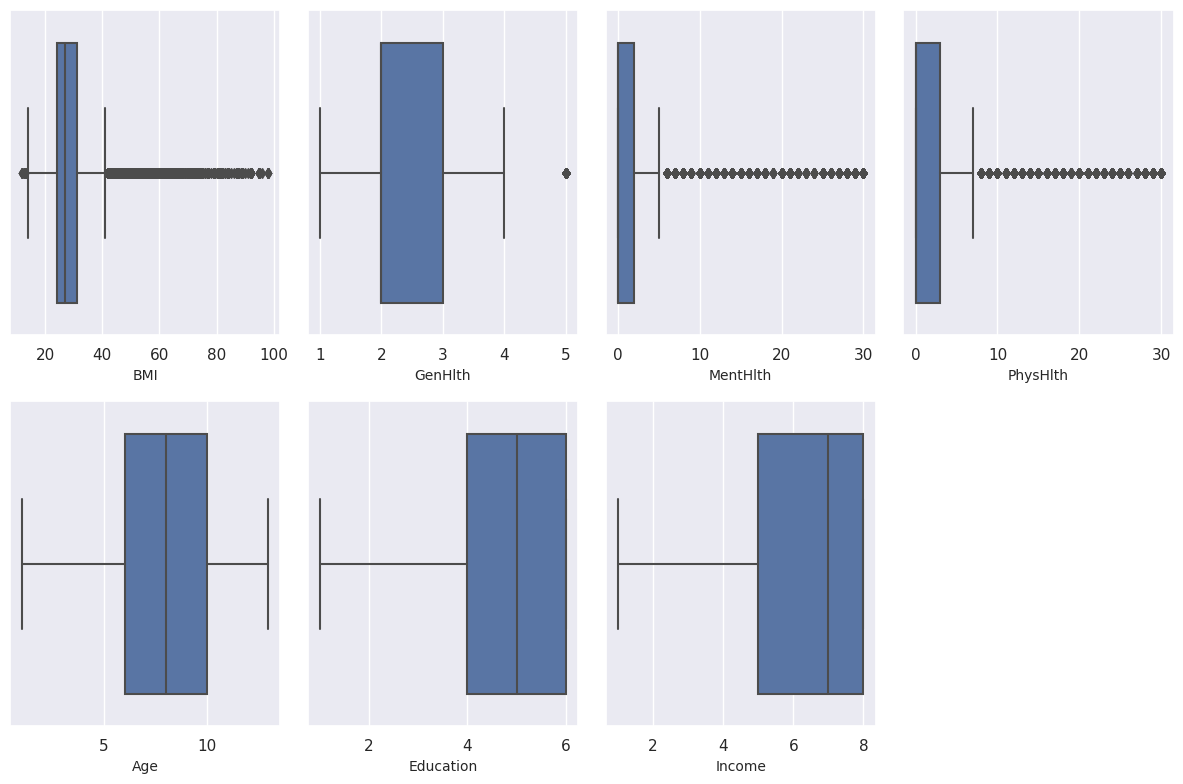

In [25]:
# Code block with warnings
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=UserWarning)

    # Define features
    features = ['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']

    #  create fig with 2 rows and 4 columns of subplots
    fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(12, 8))


    # plot each feature on a different subplot
    for i, feat in enumerate(features):
        row = i // 4
        col = i % 4
        sns.boxplot(x=df[feat], ax=axs[row, col], orient='v')
        axs[row, col].set_xlabel(feat, fontsize=10)

    # remove the last empty subplot
    plt.delaxes(axs[1, 3])


    # adjust the layout and save the figure
    plt.tight_layout()
    fig.savefig(f'{images_dir}/boxplot-outliers.png', dpi=300)



## g. Outliers Using Z-Score

In [26]:
# Define features
features = ['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']

# Generate z-scores for each feature
for feature in features:
    zscore_var = (df[feature] - df[feature].mean()) / df[feature].std(ddof=0)
    print(f"{feature}: {zscore_var.abs().max()}")
  


BMI: 10.534270687446979
GenHlth: 2.3291205669068202
MentHlth: 3.6174066182279137
PhysHlth: 2.9545898212949706
Age: 2.3024314115917863
Education: 4.108894004594432
Income: 2.4401375372928733


In [27]:
from scipy.stats import zscore


# create df
z_scores_df = pd.DataFrame(zscore(df), columns=features)

# print the Z-scores for the first 5 rows of the 'df'
print(z_scores_df.head())

# calculate the average z-score for a specific column (e.g. 'BMI')

z_score_means = []
for z_score in z_scores_df.columns:
    mean = z_scores_df[z_score].mean()
    z_score_means.append(mean)

z_score_means_df = pd.DataFrame({"column":z_scores_df.columns, 'mean':z_score_means})
print(z_score_means_df)

# max
z_score_max = []
for z_score in z_scores_df.columns:
    max = z_scores_df[z_score].max()
    z_score_max.append(max)

z_score_max_df = pd.DataFrame({"column":z_scores_df.columns, 'max':z_score_max})
print(z_score_max_df)

# min
z_score_min = []
for z_score in z_scores_df.columns:
    min = z_scores_df[z_score].min()
    z_score_min.append(min)

z_score_min_df = pd.DataFrame({"column":z_scores_df.columns, 'min':z_score_min})
print(z_score_min_df)

        BMI   GenHlth  MentHlth  PhysHlth       Age  Education    Income
0  1.757936  2.329121  1.998592  1.233999  0.316900  -1.065595 -1.474487
1 -0.511806  0.457294 -0.429630 -0.486592 -0.337933   0.963272 -2.440138
2 -0.057858  2.329121  3.617407  2.954590  0.316900  -1.065595  0.939638
3 -0.209174 -0.478619 -0.429630 -0.486592  0.971733  -2.080028 -0.026012
4 -0.663122 -0.478619 -0.024926 -0.486592  0.971733  -0.051162 -0.991662
      column          mean
0        BMI -2.505162e-16
1    GenHlth  1.711935e-16
2   MentHlth  8.963011e-18
3   PhysHlth  3.450759e-17
4        Age  6.767074e-17
5  Education -8.514861e-17
6     Income  7.170409e-17
      column        max
0        BMI  10.534271
1    GenHlth   2.329121
2   MentHlth   3.617407
3   PhysHlth   2.954590
4        Age   1.626566
5  Education   0.963272
6     Income   0.939638
      column       min
0        BMI -2.478916
1    GenHlth -1.414532
2   MentHlth -0.429630
3   PhysHlth -0.486592
4        Age -2.302431
5  Education -4.

<i><font color=#ffff99> A BMI Z-score of 10.53 means that the value for BMI is 10.53 standard deviations away from the mean BMI value in your dataset. This indicates that the BMI value is an extreme outlier in your data. 
<i><font color=#ffff99><br><br>
Similarly, a Z-score of 2.33 for GenHlth indicates that the value for GenHlth is 2.33 standard deviations away from the mean value for GenHlth. This suggests that the value for GenHlth is significantly different from the majority of the values in the dataset.
<i><font color=#ffff99><br><br>
A Z-score of 0 indicates that the value is at the mean, a Z-score of 1 indicates that the value is 1 standard deviation above the mean, and a Z-score of -1 indicates that the value is 1 standard deviation below the mean. Z-scores greater than 3 or less than -3 are generally considered to be outliers.
<i><font color=#ffff99><br><br>
Therefore, the Z-scores indicates how far away from the mean each feature is in tge dataset in terms of the number of standard deviations. A high Z-score indicates that the feature value is very different from the other values in the dataset.
 <i><font color=#ffff99><br><br>
However, I will not be removing outliers, as in the case with diabetes, they could provide a lot of information to the models, hence, improving the predicitive power. </font></i>

# 5. Train/Test Split

In [28]:
# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42, shuffle=True)

# save original splits
X_train_original = pd.DataFrame(X_train)
X_train_original.to_csv(main_dir + "/X_train.csv", index=False)

y_train_original = pd.DataFrame(y_train)
y_train_original.to_csv(main_dir + "/y_train.csv", index=False)


X_test_original = pd.DataFrame(X_test)
X_test_original.to_csv(main_dir + "/X_test.csv", index=False)

y_test_original = pd.DataFrame(y_test)
y_test_original.to_csv(main_dir + "/y_test.csv", index=False)

# state continuous variables
continuous_features = ['BMI']
# Scale the continuous variables using MinMaxScaler
scaler = MinMaxScaler()
X_train[continuous_features] = scaler.fit_transform(X_train[continuous_features])
X_test[continuous_features] = scaler.transform(X_test[continuous_features])

# Generate dummy variables for the categorical variables
categorical_features = ["GenHlth", "MentHlth", "PhysHlth", "Age", "Education","Income"]
X_train = pd.get_dummies(X_train, columns=categorical_features, prefix=categorical_features, drop_first=True)
X_test = pd.get_dummies(X_test, columns=categorical_features, prefix=categorical_features, drop_first=True)

# Concatenate the scaled continuous variables and dummy variables
scaled_features = X_train.columns
scaled_features_test = X_test.columns
X_train = pd.DataFrame(X_train, columns=scaled_features)
X_test = pd.DataFrame(X_test, columns=scaled_features_test)

# save scaled splits
X_train_scaled = pd.DataFrame(X_train)
X_train_scaled.to_csv(main_dir + "/X_train_scaled.csv", index=False)

y_train_scaled = pd.DataFrame(y_train)
y_train_scaled.to_csv(main_dir + "/y_train_scaled.csv", index=False)


X_test_scaled = pd.DataFrame(X_test)
X_test_scaled.to_csv(main_dir + "/X_test_scaled.csv", index=False)

y_test_scaled = pd.DataFrame(y_test)
y_test_scaled.to_csv(main_dir + "/y_test_scaled.csv", index=False)


# 6. Models

## a. Benchmark Models Before Sampling and Feature Selection

{'fit_time': array([14.99973917, 14.22582221, 14.10417032, 14.92501569, 17.5138011 ]), 'score_time': array([0.10516596, 0.12183404, 0.11191916, 0.11813641, 0.1217792 ]), 'estimator': [LogisticRegression(max_iter=10000), LogisticRegression(max_iter=10000), LogisticRegression(max_iter=10000), LogisticRegression(max_iter=10000), LogisticRegression(max_iter=10000)], 'test_accuracy': array([0.8657518 , 0.86523442, 0.86486486, 0.86501269, 0.8663398 ]), 'test_f1': array([0.24685556, 0.25006855, 0.23425939, 0.24249965, 0.24684159]), 'test_recall': array([0.15791335, 0.16127321, 0.14833805, 0.15505658, 0.15720601]), 'test_precision': array([0.56518987, 0.55643685, 0.55673524, 0.55611921, 0.57428941]), 'test_auc': array([0.56912385, 0.57023127, 0.56460786, 0.56750911, 0.56917066])}
Best model based on F1 score: 1


<ipython-input-29-3b5e8c092e54>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_results_cv_bench = test_results_cv_bench.append({'Model_test': name,
<ipython-input-29-3b5e8c092e54>:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_results_bench = train_results_bench.append({'Model_train': name,
<ipython-input-29-3b5e8c092e54>:69: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_results_bench = test_results_bench.append({'Model_test': name,


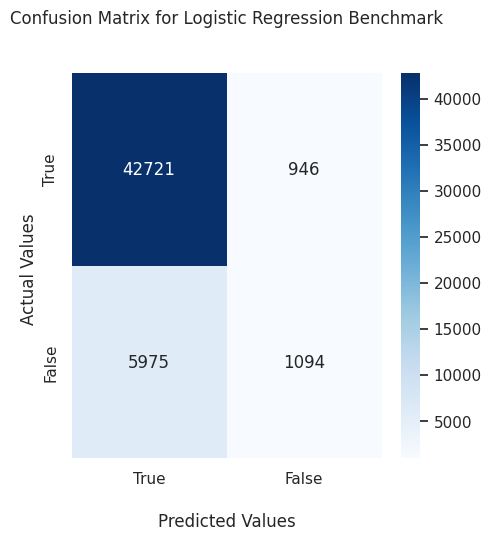

{'fit_time': array([0.52010822, 0.49358416, 0.50423908, 0.50520444, 0.4805541 ]), 'score_time': array([0.13004541, 0.13223147, 0.13476539, 0.13462067, 0.13070679]), 'estimator': [GaussianNB(), GaussianNB(), GaussianNB(), GaussianNB(), GaussianNB()], 'test_accuracy': array([0.78602577, 0.79317056, 0.79455025, 0.79526473, 0.74480142]), 'test_f1': array([0.35804568, 0.35527225, 0.35281335, 0.35958693, 0.37916567]), 'test_recall': array([0.42829355, 0.40901857, 0.40187412, 0.41248232, 0.55932803]), 'test_precision': array([0.30759462, 0.31401032, 0.314428  , 0.31871585, 0.28678937]), 'test_auc': array([0.63611391, 0.63218719, 0.63000127, 0.63486166, 0.66707706])}
Best model based on F1 score: 4


<ipython-input-29-3b5e8c092e54>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_results_cv_bench = test_results_cv_bench.append({'Model_test': name,
<ipython-input-29-3b5e8c092e54>:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_results_bench = train_results_bench.append({'Model_train': name,
<ipython-input-29-3b5e8c092e54>:69: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_results_bench = test_results_bench.append({'Model_test': name,


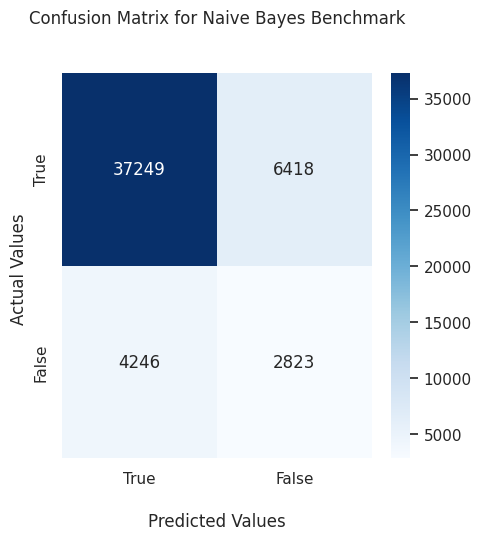

{'fit_time': array([157.4042418 , 162.44379997, 142.74836588, 119.32666206,
       181.17288351]), 'score_time': array([0.15760827, 0.16139245, 0.23230124, 0.14769244, 0.16865277]), 'estimator': [MLPClassifier(hidden_layer_sizes=(16, 8), max_iter=1000), MLPClassifier(hidden_layer_sizes=(16, 8), max_iter=1000), MLPClassifier(hidden_layer_sizes=(16, 8), max_iter=1000), MLPClassifier(hidden_layer_sizes=(16, 8), max_iter=1000), MLPClassifier(hidden_layer_sizes=(16, 8), max_iter=1000)], 'test_accuracy': array([0.86415039, 0.86397793, 0.86658947, 0.86585035, 0.86584705]), 'test_f1': array([0.30308392, 0.27307439, 0.26516488, 0.28156749, 0.26587569]), 'test_recall': array([0.21202476, 0.18337754, 0.17273692, 0.18864922, 0.17435897]), 'test_precision': array([0.53123615, 0.53453608, 0.57034442, 0.55486219, 0.55959137]), 'test_auc': array([0.59086954, 0.5787644 , 0.57583401, 0.58207259, 0.57607251])}
Best model based on F1 score: 0


<ipython-input-29-3b5e8c092e54>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_results_cv_bench = test_results_cv_bench.append({'Model_test': name,
<ipython-input-29-3b5e8c092e54>:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_results_bench = train_results_bench.append({'Model_train': name,
<ipython-input-29-3b5e8c092e54>:69: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_results_bench = test_results_bench.append({'Model_test': name,


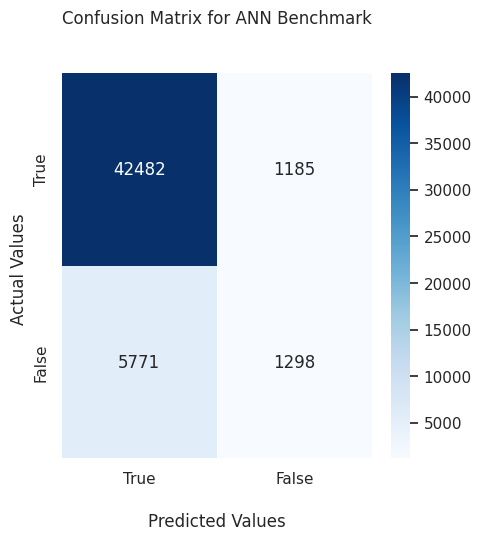

Training Results:
           Model_train  Accuracy_train  F1-score_train  Recall_train  \
0  Logistic Regression        0.865682        0.245676      0.156983   
1          Naive Bayes        0.791938        0.354150      0.409414   
2                  ANN        0.869767        0.308983      0.208968   

   Precision_train  AUC_train  
0         0.564758   0.568698  
1         0.312032   0.631639  
2         0.592619   0.592856  


Test Results:
            Model_test  Accuracy_test  F1-score_test  Recall_test  \
0  Logistic Regression       0.863588       0.240202     0.154760   
1          Naive Bayes       0.789814       0.346168     0.399349   
2                  ANN       0.862898       0.271776     0.183619   

   Precision_test  AUC_test  
0        0.536275  0.566548  
1        0.305486  0.626187  
2        0.522755  0.578241  


In [29]:

# define models
models = {'Logistic Regression': LogisticRegression(max_iter=10000), 
          'Naive Bayes': GaussianNB(), 
          'ANN': MLPClassifier(hidden_layer_sizes=(16, 8), max_iter=1000)}

# evaluate models with cross-validation
metrics = {'accuracy': make_scorer(accuracy_score),
           'f1': make_scorer(f1_score),
           'recall': make_scorer(recall_score),
           'precision': make_scorer(precision_score),
           'auc': make_scorer(roc_auc_score)}

# save results to DataFrame
train_results_cv_bench = pd.DataFrame(columns=['Model_train', 'Accuracy_train', 'F1-score_train', 'Recall_train', 'Precision_train', 'AUC_train'])
test_results_cv_bench = pd.DataFrame(columns=['Model_test', 'Accuracy_test', 'F1-score_test', 'Recall_test', 'Precision_test', 'AUC_test'])

train_results_bench = pd.DataFrame(columns=['Model_train', 'Accuracy_train', 'F1-score_train', 'Recall_train', 'Precision_train', 'AUC_train'])
test_results_bench = pd.DataFrame(columns=['Model_test', 'Accuracy_test', 'F1-score_test', 'Recall_test', 'Precision_test', 'AUC_test'])

for name, model in models.items():
    # perform cross validation
    cv_results_bench = cross_validate(model, X_train, y_train, cv=5, scoring=metrics, return_estimator=True)

    print(cv_results_bench)
    
    
    test_results_cv_bench = test_results_cv_bench.append({'Model_test': name, 
                                        'Accuracy_test': cv_results_bench['test_accuracy'].mean(), 
                                        'F1-score_test': cv_results_bench['test_f1'].mean(), 
                                        'Recall_test': cv_results_bench['test_recall'].mean(), 
                                        'Precision_test': cv_results_bench['test_precision'].mean(), 
                                        'AUC_test': cv_results_bench['test_auc'].mean()}, ignore_index=True)

    
    # select the best model based on the highest F1 score
    best_f1_model_bench = np.argmax(cv_results_bench['test_f1'])
    print("Best model based on F1 score:", best_f1_model_bench)

    # fit the best model on the entire training set
    best_model_bench = cv_results_bench['estimator'][best_f1_model_bench]
    best_model_bench.fit(X_train, y_train)
  
    
    # make predictions on the training and test sets
    y_train_pred = best_model_bench.predict(X_train)
    y_test_pred = best_model_bench.predict(X_test)
    
    # calculate evaluation metrics on the training set
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred)
    train_recall = recall_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred)
    train_auc = roc_auc_score(y_train, y_train_pred)
    
    # calculate evaluation metrics on the test set
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred)
    test_auc = roc_auc_score(y_test, y_test_pred)
    
    # store results in dataframes
    train_results_bench = train_results_bench.append({'Model_train': name, 
                                          'Accuracy_train': train_accuracy, 
                                          'F1-score_train': train_f1, 
                                          'Recall_train': train_recall, 
                                          'Precision_train': train_precision, 
                                          'AUC_train': train_auc}, ignore_index=True)
    test_results_bench = test_results_bench.append({'Model_test': name, 
                                        'Accuracy_test': test_accuracy, 
                                        'F1-score_test': test_f1, 
                                        'Recall_test': test_recall, 
                                        'Precision_test': test_precision,
                                        'AUC_test': test_auc}, ignore_index=True)

    confusion_matrix_plot(confusion_matrix(y_test, y_test_pred), name+' benchmark', name+' Benchmark')
# print results
print("Training Results:")
print(train_results_bench)
print("\n")
print("Test Results:")
print(test_results_bench)


In [30]:
df_train_results_bench = train_results_bench.sort_values(by=['F1-score_train'], ascending=[False])
df_test_results_bench = test_results_bench.sort_values(by=['F1-score_test'], ascending=[False])

In [31]:
display(df_train_results_bench)

,Model_train,Accuracy_train,F1-score_train,Recall_train,Precision_train,AUC_train
1,Naive Bayes,0.791938,0.354150,0.409414,0.312032,0.631639
2,ANN,0.869767,0.308983,0.208968,0.592619,0.592856
0,Logistic Regression,0.865682,0.245676,0.156983,0.564758,0.568698


In [32]:
display(df_test_results_bench)

,Model_test,Accuracy_test,F1-score_test,Recall_test,Precision_test,AUC_test
1,Naive Bayes,0.789814,0.346168,0.399349,0.305486,0.626187
2,ANN,0.862898,0.271776,0.183619,0.522755,0.578241
0,Logistic Regression,0.863588,0.240202,0.154760,0.536275,0.566548


In [33]:
# #@title
# %%script echo skipping
# save model data to csv - google drive
df_train_results_bench.to_csv(main_dir + 'train_results_bench', index = False)
df_test_results_bench.to_csv(main_dir + 'test_results_bench', index = False)

## b. Random Forest Feature Engineering on Benchmark Unsampled Dataset

{'fit_time': array([104.55048966, 171.24921584, 149.51053548, 120.66526985,
       172.52173638]), 'score_time': array([0.27522707, 0.13976955, 0.25214624, 0.17184567, 0.15312696]), 'estimator': [MLPClassifier(hidden_layer_sizes=(16, 8), max_iter=1000), MLPClassifier(hidden_layer_sizes=(16, 8), max_iter=1000), MLPClassifier(hidden_layer_sizes=(16, 8), max_iter=1000), MLPClassifier(hidden_layer_sizes=(16, 8), max_iter=1000), MLPClassifier(hidden_layer_sizes=(16, 8), max_iter=1000)], 'test_accuracy': array([0.86518515, 0.86437212, 0.86550543, 0.86560398, 0.8648369 ]), 'test_f1': array([0.23275379, 0.27575319, 0.24526476, 0.25488321, 0.28493222]), 'test_recall': array([0.14677277, 0.18532272, 0.15682461, 0.16495757, 0.19328028]), 'test_precision': array([0.5619499 , 0.5385406 , 0.56246037, 0.56036036, 0.5418939 ]), 'test_auc': array([0.56412606, 0.57980855, 0.56853626, 0.57200158, 0.58341482])}
Best model based on F1 score: 4


<ipython-input-34-c2512f501157>:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_results_cv_rf_bench = test_results_cv_rf_bench.append({'Model_test': name,
<ipython-input-34-c2512f501157>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_results_rf_bench = train_results_rf_bench.append({'Model_train_rf': name,
<ipython-input-34-c2512f501157>:81: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_results_rf_bench = test_results_rf_bench.append({'Model_test_rf': name,


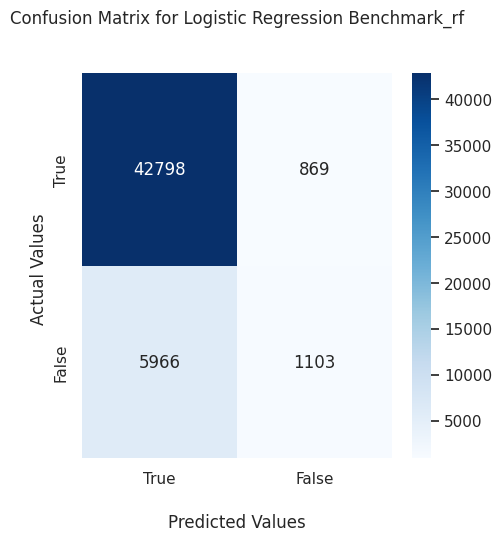

{'fit_time': array([136.75919342, 205.0751822 , 123.24323654, 162.85201812,
       123.10068226]), 'score_time': array([0.1772511 , 0.13742042, 0.30738235, 0.14199281, 0.2755568 ]), 'estimator': [MLPClassifier(hidden_layer_sizes=(16, 8), max_iter=1000), MLPClassifier(hidden_layer_sizes=(16, 8), max_iter=1000), MLPClassifier(hidden_layer_sizes=(16, 8), max_iter=1000), MLPClassifier(hidden_layer_sizes=(16, 8), max_iter=1000), MLPClassifier(hidden_layer_sizes=(16, 8), max_iter=1000)], 'test_accuracy': array([0.86484023, 0.86459386, 0.86649092, 0.86501269, 0.86715285]), 'test_f1': array([0.27279958, 0.2230704 , 0.24809213, 0.26367424, 0.30064851]), 'test_recall': array([0.18196286, 0.13952255, 0.15806223, 0.17344413, 0.20495137]), 'test_precision': array([0.54473266, 0.55602537, 0.57640232, 0.54957983, 0.56399027]), 'test_auc': array([0.57867251, 0.56074427, 0.5696274 , 0.57521432, 0.58965114])}
Best model based on F1 score: 4


<ipython-input-34-c2512f501157>:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_results_cv_rf_bench = test_results_cv_rf_bench.append({'Model_test': name,
<ipython-input-34-c2512f501157>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_results_rf_bench = train_results_rf_bench.append({'Model_train_rf': name,
<ipython-input-34-c2512f501157>:81: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_results_rf_bench = test_results_rf_bench.append({'Model_test_rf': name,


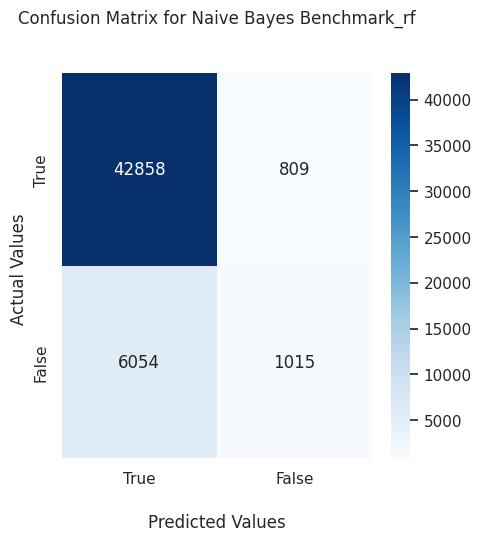

{'fit_time': array([132.77687812, 190.91494203, 104.94064951, 131.87589669,
       114.04002452]), 'score_time': array([0.17580128, 0.25468135, 0.136976  , 0.2920773 , 0.14086127]), 'estimator': [MLPClassifier(hidden_layer_sizes=(16, 8), max_iter=1000), MLPClassifier(hidden_layer_sizes=(16, 8), max_iter=1000), MLPClassifier(hidden_layer_sizes=(16, 8), max_iter=1000), MLPClassifier(hidden_layer_sizes=(16, 8), max_iter=1000), MLPClassifier(hidden_layer_sizes=(16, 8), max_iter=1000)], 'test_accuracy': array([0.86525906, 0.86427357, 0.86437212, 0.86336199, 0.86629053]), 'test_f1': array([0.25964532, 0.26849024, 0.25051055, 0.28067445, 0.2402352 ]), 'test_recall': array([0.16958444, 0.17877984, 0.16265912, 0.19130127, 0.15172414]), 'test_precision': array([0.55369515, 0.53891258, 0.54470101, 0.52677702, 0.5766129 ]), 'test_auc': array([0.5737285 , 0.57700943, 0.57032278, 0.58173829, 0.56684481])}
Best model based on F1 score: 3


<ipython-input-34-c2512f501157>:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_results_cv_rf_bench = test_results_cv_rf_bench.append({'Model_test': name,
<ipython-input-34-c2512f501157>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_results_rf_bench = train_results_rf_bench.append({'Model_train_rf': name,
<ipython-input-34-c2512f501157>:81: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_results_rf_bench = test_results_rf_bench.append({'Model_test_rf': name,


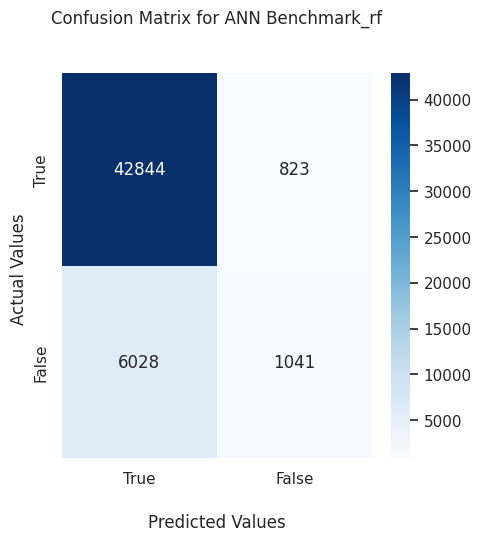

Training Results:
        Model_train_rf  Accuracy_train_rf  F1-score_train_rf  Recall_train_rf  \
0  Logistic Regression           0.868028           0.261342         0.167557   
1          Naive Bayes           0.867564           0.242837         0.152421   
2                  ANN           0.868023           0.251090         0.158786   

   Precision_train_rf  AUC_train_rf  
0            0.593586      0.574492  
1            0.596953      0.567880  
2            0.599706      0.570814  


Test Results:
         Model_test_rf  Accuracy_test_rf  F1-score_test_rf  Recall_test_rf  \
0  Logistic Regression          0.865283          0.244000        0.156033   
1          Naive Bayes          0.864731          0.228269        0.143585   
2                  ANN          0.864968          0.233068        0.147263   

   Precision_test_rf  AUC_test_rf  
0           0.559331     0.568066  
1           0.556469     0.562529  
2           0.558476     0.564208  


In [34]:
# define feature selection model
selection = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42),)

# fit feature selection model on resampled data
selection.fit(X_train, y_train)

# transform X_resampled and X_test with selected features
X_train_selected = selection.transform(X_train)
X_test_selected = selection.transform(X_test)


# define models
models_rf_bench = {'Logistic Regression': LogisticRegression(max_iter=10000), 
          'Naive Bayes': GaussianNB(), 
          'ANN': MLPClassifier(hidden_layer_sizes=(16, 8), max_iter=1000)}

# evaluate models with cross-validation
metrics_rf_bench = {'accuracy': make_scorer(accuracy_score),
           'f1': make_scorer(f1_score),
           'recall': make_scorer(recall_score),
           'precision': make_scorer(precision_score),
           'auc': make_scorer(roc_auc_score)}

# save train/test results
train_results_rf_bench = pd.DataFrame(columns=['Model_train_rf', 'Accuracy_train_rf', 'F1-score_train_rf', 'Recall_train_rf', 'Precision_train_rf', 'AUC_train_rf'])
test_results_rf_bench = pd.DataFrame(columns=['Model_test_rf', 'Accuracy_test_rf', 'F1-score_test_rf', 'Recall_test_rf', 'Precision_test_rf', 'AUC_test_rf'])
# save cv results
test_results_cv_rf_bench = pd.DataFrame(columns=['Model_test_rf', 'Accuracy_test_rf', 'F1-score_test_rf', 'Recall_test_rf', 'Precision_test_rf', 'AUC_test_rf'])

for name, model_rf_bench in models_rf_bench.items():

    # perform cross validation
    cv_results_rf_bench = cross_validate(model, X_train, y_train, cv=5, scoring=metrics, return_estimator=True)

    print(cv_results_rf_bench)
    
    
    test_results_cv_rf_bench = test_results_cv_rf_bench.append({'Model_test': name, 
                                        'Accuracy_test': cv_results_rf_bench['test_accuracy'].mean(), 
                                        'F1-score_test': cv_results_rf_bench['test_f1'].mean(), 
                                        'Recall_test': cv_results_rf_bench['test_recall'].mean(), 
                                        'Precision_test': cv_results_rf_bench['test_precision'].mean(), 
                                        'AUC_test': cv_results_rf_bench['test_auc'].mean()}, ignore_index=True)

    
    # select the best model based on the highest F1 score
    best_f1_model_rf_bench = np.argmax(cv_results_rf_bench['test_f1'])
    print("Best model based on F1 score:", best_f1_model_rf_bench)

    # fit the best model on the entire training set
    best_model_rf_bench = cv_results_rf_bench['estimator'][best_f1_model_rf_bench]
  
    # fit the model on the training set
    best_model_rf_bench.fit(X_train_selected, y_train)
    
    # make predictions on the training and test sets
    y_train_pred_rf_bench = best_model_rf_bench.predict(X_train_selected)
    y_test_pred_rf_bench = best_model_rf_bench.predict(X_test_selected)
    
    # calculate evaluation metrics on the training set
    train_accuracy = accuracy_score(y_train, y_train_pred_rf_bench)
    train_f1 = f1_score(y_train, y_train_pred_rf_bench)
    train_recall = recall_score(y_train, y_train_pred_rf_bench)
    train_precision = precision_score(y_train, y_train_pred_rf_bench)
    train_auc = roc_auc_score(y_train, y_train_pred_rf_bench)
    
    # calculate evaluation metrics on the test set
    test_accuracy = accuracy_score(y_test, y_test_pred_rf_bench)
    test_f1 = f1_score(y_test, y_test_pred_rf_bench)
    test_recall = recall_score(y_test, y_test_pred_rf_bench)
    test_precision = precision_score(y_test, y_test_pred_rf_bench)
    test_auc = roc_auc_score(y_test, y_test_pred_rf_bench)
    
    # store results in dataframes
    train_results_rf_bench = train_results_rf_bench.append({'Model_train_rf': name, 
                                          'Accuracy_train_rf': train_accuracy, 
                                          'F1-score_train_rf': train_f1, 
                                          'Recall_train_rf': train_recall, 
                                          'Precision_train_rf': train_precision, 
                                          'AUC_train_rf': train_auc}, ignore_index=True)
    test_results_rf_bench = test_results_rf_bench.append({'Model_test_rf': name, 
                                        'Accuracy_test_rf': test_accuracy, 
                                        'F1-score_test_rf': test_f1, 
                                        'Recall_test_rf': test_recall, 
                                        'Precision_test_rf': test_precision, 
                                        'AUC_test_rf': test_auc}, ignore_index=True)
    
    confusion_matrix_plot(confusion_matrix(y_test, y_test_pred_rf_bench), name+' benchmark_rf', name+' Benchmark_rf')

# print results
print("Training Results:")
print(train_results_rf_bench)
print("\n")
print("Test Results:")
print(test_results_rf_bench)


In [35]:
df_train_results_rf_bench = train_results_rf_bench.sort_values(by=['F1-score_train_rf'], ascending=[False])
df_test_results_rf_bench = test_results_rf_bench.sort_values(by=['F1-score_test_rf'], ascending=[False])

In [36]:
display(df_train_results_rf_bench)

,Model_train_rf,Accuracy_train_rf,F1-score_train_rf,Recall_train_rf,Precision_train_rf,AUC_train_rf
0,Logistic Regression,0.868028,0.261342,0.167557,0.593586,0.574492
2,ANN,0.868023,0.251090,0.158786,0.599706,0.570814
1,Naive Bayes,0.867564,0.242837,0.152421,0.596953,0.567880


In [37]:
display(df_train_results_rf_bench)

,Model_train_rf,Accuracy_train_rf,F1-score_train_rf,Recall_train_rf,Precision_train_rf,AUC_train_rf
0,Logistic Regression,0.868028,0.261342,0.167557,0.593586,0.574492
2,ANN,0.868023,0.251090,0.158786,0.599706,0.570814
1,Naive Bayes,0.867564,0.242837,0.152421,0.596953,0.567880


In [38]:
# #@title
# %%script echo skipping
# save model data to csv - google drive
df_train_results_rf_bench.to_csv(main_dir + 'train_results_rf_bench', index = False)
df_test_results_rf_bench.to_csv(main_dir + 'test_results_rf_bench', index = False)

## Feature Importance after Random Forest Feature Engineering on Benchmark

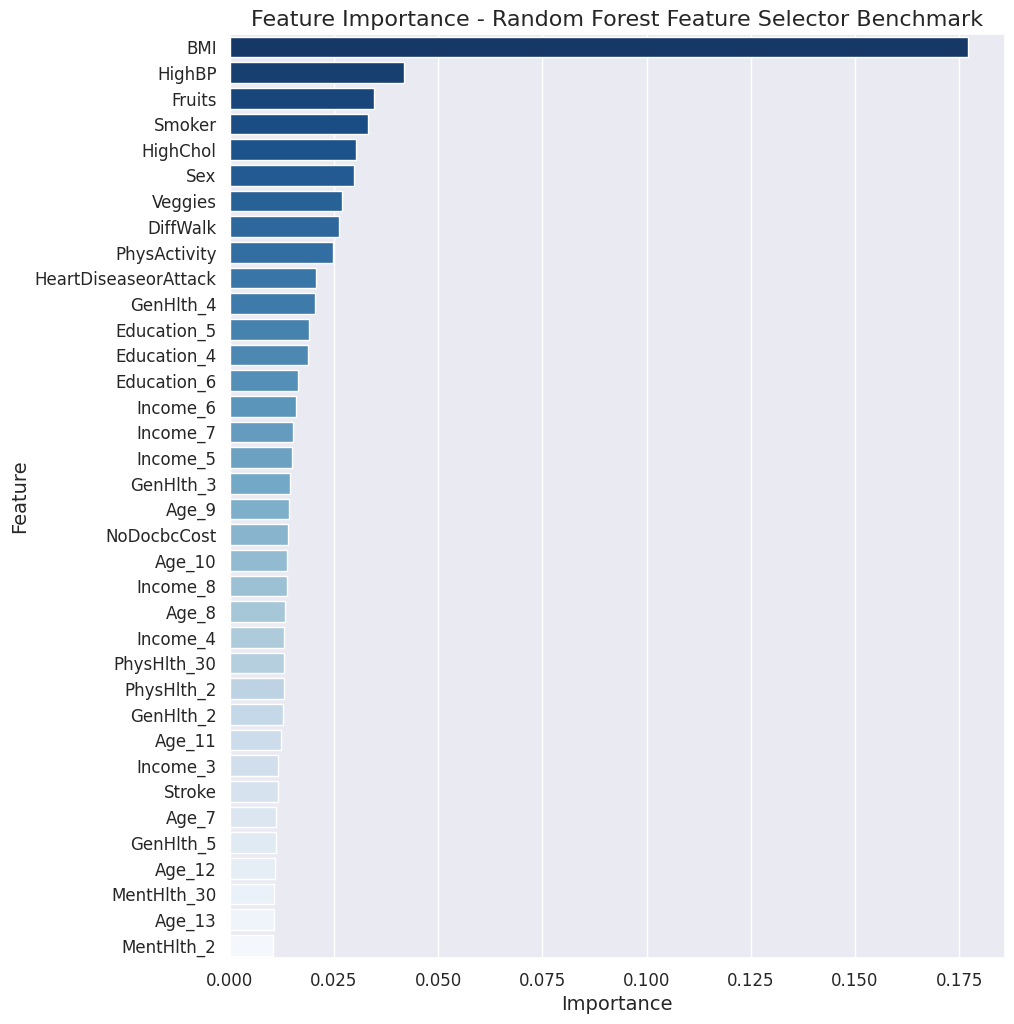

Number of features before selection: 103
Number of features after selection: 36


In [39]:
# extract selected features and their indices
selected_features = X_train.columns[selection.get_support()]
selected_indices = selection.get_support(indices=True)


# extract feature importance
feature_importance = selection.estimator_.feature_importances_


# create a DataFrame with selected features and their importance
df_importance = pd.DataFrame({'Feature': selected_features, 'Importance': feature_importance[selected_indices]})
df_importance = df_importance.sort_values(by='Importance', ascending=False)

# plot feature importance using seaborn
plt.figure(figsize=(10, 12))
sns.barplot(x='Importance', y='Feature', data=df_importance, palette='Blues_r')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.title('Feature Importance - Random Forest Feature Selector Benchmark', fontsize=16)
plt.savefig(images_dir + "feature_importance_bench_rf.png", dpi=300, bbox_inches='tight')
plt.show()


# print the number of features before and after selection
print("Number of features before selection:", X_train.shape[1])
print("Number of features after selection:", len(selected_features))

# 7. Sampling and Random Forest Feature Engineering

## a. Undersampling

In [40]:
# Balance the training set using undersampling
rus = RandomUnderSampler(random_state=42)
X_train_undersampled, y_train_undersampled = rus.fit_resample(X_train, y_train)

# save under_sampled splits
X_train_undersampled = pd.DataFrame(X_train_undersampled)
X_train_undersampled.to_csv(main_dir + "/X_train_under.csv", index=False)

y_train_undersampled = pd.DataFrame(y_train_undersampled)
y_train_undersampled.to_csv(main_dir + "/y_train_under.csv", index=False)


In [41]:
# use of counter method to check for balance of data
counter = Counter(y_train_undersampled)
print(counter)

Counter({'Diabetes_binary': 1})


In [42]:
# check for the balance of data
print(f' Diabetes vs. Non Diabetesa: \n {np.round(y_train_undersampled.value_counts().sort_values() / len(y_train_undersampled) * 100, 2)}')

 Diabetes vs. Non Diabetesa: 
 Diabetes_binary
0                  50.0
1                  50.0
dtype: float64


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

{'fit_time': array([3.88792849, 3.74641228, 4.33513546, 5.31119084, 3.22103715]), 'score_time': array([0.06978989, 0.06183434, 0.14987898, 0.06413174, 0.06601214]), 'estimator': [LogisticRegression(max_iter=10000), LogisticRegression(max_iter=10000), LogisticRegression(max_iter=10000), LogisticRegression(max_iter=10000), LogisticRegression(max_iter=10000)], 'test_accuracy': array([0.75263018, 0.75201132, 0.74051808, 0.74776766, 0.74792219]), 'test_f1': array([0.75962199, 0.75716388, 0.74665516, 0.75377578, 0.75534197]), 'test_recall': array([0.78178603, 0.77329797, 0.76467468, 0.77210042, 0.77824934]), 'test_precision': array([0.73868003, 0.74168928, 0.72946534, 0.73630079, 0.73374458]), 'test_auc': array([0.75263276, 0.7520132 , 0.74051594, 0.74776551, 0.74792219])}
Best model based on F1 score: 0


<ipython-input-43-41b817587518>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_results_cv = test_results_cv.append({'Model_test': name,
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-43-41b817587518>:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_results = train_results.append({'Model_train': name,
<ipython-input-43-41b817587518>:69: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_results = test_results.append({'Model_test': name,


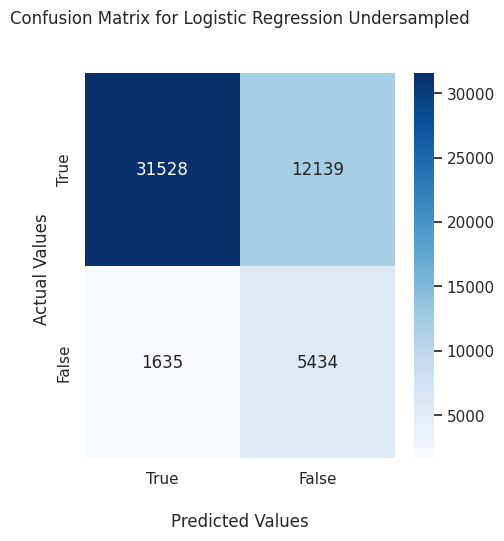

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

{'fit_time': array([0.14345598, 0.13245392, 0.19843292, 0.18457651, 0.17770815]), 'score_time': array([0.06051922, 0.07059097, 0.08179045, 0.08441019, 0.07909584]), 'estimator': [GaussianNB(), GaussianNB(), GaussianNB(), GaussianNB(), GaussianNB()], 'test_accuracy': array([0.61082132, 0.60587039, 0.6041022 , 0.64141102, 0.62599469]), 'test_f1': array([0.46330163, 0.4520649 , 0.44865797, 0.55023287, 0.5194274 ]), 'test_recall': array([0.33598585, 0.32519894, 0.32213579, 0.43864922, 0.40424403]), 'test_precision': array([0.74597566, 0.74123337, 0.73884834, 0.7379536 , 0.7264061 ]), 'test_auc': array([0.61079703, 0.60584558, 0.60412713, 0.64142894, 0.62599469])}
Best model based on F1 score: 3


<ipython-input-43-41b817587518>:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_results = train_results.append({'Model_train': name,
<ipython-input-43-41b817587518>:69: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_results = test_results.append({'Model_test': name,


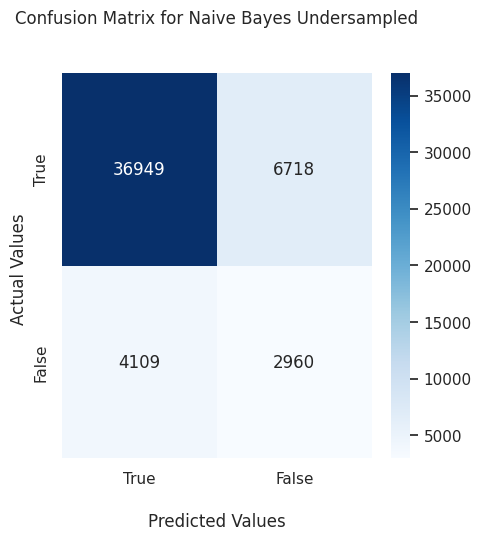

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when 

{'fit_time': array([ 89.67103601,  86.13822174,  88.89206052, 109.80763507,
       111.59786701]), 'score_time': array([0.17477751, 0.0694716 , 0.06952286, 0.15994072, 0.07321787]), 'estimator': [MLPClassifier(hidden_layer_sizes=(16, 8), max_iter=1000), MLPClassifier(hidden_layer_sizes=(16, 8), max_iter=1000), MLPClassifier(hidden_layer_sizes=(16, 8), max_iter=1000), MLPClassifier(hidden_layer_sizes=(16, 8), max_iter=1000), MLPClassifier(hidden_layer_sizes=(16, 8), max_iter=1000)], 'test_accuracy': array([0.74113695, 0.7444081 , 0.73397578, 0.74175581, 0.7443855 ]), 'test_f1': array([0.74802065, 0.75821694, 0.73303167, 0.74401893, 0.74867426]), 'test_recall': array([0.76852343, 0.80159151, 0.73037482, 0.75053041, 0.76145004]), 'test_precision': array([0.7285834 , 0.71929546, 0.73570793, 0.73761946, 0.73632011]), 'test_auc': array([0.74113937, 0.74441315, 0.73397609, 0.74175504, 0.7443855 ])}
Best model based on F1 score: 1


<ipython-input-43-41b817587518>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_results_cv = test_results_cv.append({'Model_test': name,
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-43-41b817587518>:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_results = train_results.append({'Model_train': name,
<ipython-input-43-41b817587518>:69: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_results = test_results.append({'Model_test': name,


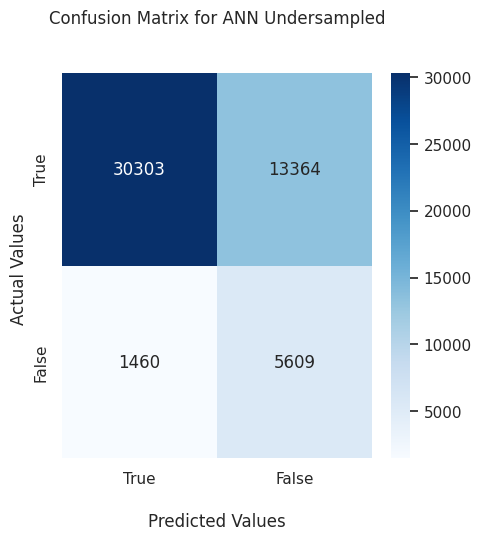

Training Results:
           Model_train  Accuracy_train  F1-score_train  Recall_train  \
0  Logistic Regression        0.749125        0.755455      0.775011   
1          Naive Bayes        0.636436        0.540547      0.427733   
2                  ANN        0.763942        0.775510      0.815468   

   Precision_train  AUC_train  
0         0.736862   0.749125  
1         0.734187   0.636436  
2         0.739284   0.763942  


Test Results:
            Model_test  Accuracy_test  F1-score_test  Recall_test  \
0  Logistic Regression       0.728516       0.441036     0.768708   
1          Naive Bayes       0.786601       0.353496     0.418730   
2                  ANN       0.707821       0.430766     0.793464   

   Precision_test  AUC_test  
0        0.309224  0.745359  
1        0.305848  0.632442  
2        0.295631  0.743710  


In [43]:

# define models
models = {'Logistic Regression': LogisticRegression(max_iter=10000), 
          'Naive Bayes': GaussianNB(), 
          'ANN': MLPClassifier(hidden_layer_sizes=(16, 8), max_iter=1000)}

# evaluate models with cross-validation
metrics = {'accuracy': make_scorer(accuracy_score),
           'f1': make_scorer(f1_score),
           'recall': make_scorer(recall_score),
           'precision': make_scorer(precision_score),
           'auc': make_scorer(roc_auc_score)}

# save results to DataFrame
train_results_cv = pd.DataFrame(columns=['Model_train', 'Accuracy_train', 'F1-score_train', 'Recall_train', 'Precision_train', 'AUC_train'])
test_results_cv = pd.DataFrame(columns=['Model_test', 'Accuracy_test', 'F1-score_test', 'Recall_test', 'Precision_test', 'AUC_test'])

train_results = pd.DataFrame(columns=['Model_train', 'Accuracy_train', 'F1-score_train', 'Recall_train', 'Precision_train', 'AUC_train'])
test_results = pd.DataFrame(columns=['Model_test', 'Accuracy_test', 'F1-score_test', 'Recall_test', 'Precision_test', 'AUC_test'])

for name, model in models.items():
    # perform cross validation
    cv_results = cross_validate(model, X_train_undersampled, y_train_undersampled, cv=5, scoring=metrics, return_estimator=True)

    print(cv_results)
    
    
    test_results_cv = test_results_cv.append({'Model_test': name, 
                                        'Accuracy_test': cv_results['test_accuracy'].mean(), 
                                        'F1-score_test': cv_results['test_f1'].mean(), 
                                        'Recall_test': cv_results['test_recall'].mean(), 
                                        'Precision_test': cv_results['test_precision'].mean(), 
                                        'AUC_test': cv_results['test_auc'].mean()}, ignore_index=True)

    
    # select the best model based on the highest F1 score
    best_f1_model = np.argmax(cv_results['test_f1'])
    print("Best model based on F1 score:", best_f1_model)

    # fit the best model on the entire training set
    best_model = cv_results['estimator'][best_f1_model]
    best_model.fit(X_train_undersampled, y_train_undersampled)
  
    
    # make predictions on the training and test sets
    y_train_pred = best_model.predict(X_train_undersampled)
    y_test_pred = best_model.predict(X_test)
    
    # calculate evaluation metrics on the training set
    train_accuracy = accuracy_score(y_train_undersampled, y_train_pred)
    train_f1 = f1_score(y_train_undersampled, y_train_pred)
    train_recall = recall_score(y_train_undersampled, y_train_pred)
    train_precision = precision_score(y_train_undersampled, y_train_pred)
    train_auc = roc_auc_score(y_train_undersampled, y_train_pred)
    
    # calculate evaluation metrics on the test set
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred)
    test_auc = roc_auc_score(y_test, y_test_pred)
    
    # store results in dataframes
    train_results = train_results.append({'Model_train': name, 
                                          'Accuracy_train': train_accuracy, 
                                          'F1-score_train': train_f1, 
                                          'Recall_train': train_recall, 
                                          'Precision_train': train_precision, 
                                          'AUC_train': train_auc}, ignore_index=True)
    test_results = test_results.append({'Model_test': name, 
                                        'Accuracy_test': test_accuracy, 
                                        'F1-score_test': test_f1, 
                                        'Recall_test': test_recall, 
                                        'Precision_test': test_precision, 
                                        'AUC_test': test_auc}, ignore_index=True)
    
    confusion_matrix_plot(confusion_matrix(y_test, y_test_pred), name+' Undersampled', name+' Undersampled')

# print results
print("Training Results:")
print(train_results)
print("\n")
print("Test Results:")
print(test_results)


In [44]:
df_train_results = train_results.sort_values(by=['F1-score_train'], ascending=[False])
df_test_results = test_results.sort_values(by=['F1-score_test'], ascending=[False])

In [45]:
display(df_train_results)

,Model_train,Accuracy_train,F1-score_train,Recall_train,Precision_train,AUC_train
2,ANN,0.763942,0.775510,0.815468,0.739284,0.763942
0,Logistic Regression,0.749125,0.755455,0.775011,0.736862,0.749125
1,Naive Bayes,0.636436,0.540547,0.427733,0.734187,0.636436


In [46]:
display(df_test_results)

,Model_test,Accuracy_test,F1-score_test,Recall_test,Precision_test,AUC_test
0,Logistic Regression,0.728516,0.441036,0.768708,0.309224,0.745359
2,ANN,0.707821,0.430766,0.793464,0.295631,0.743710
1,Naive Bayes,0.786601,0.353496,0.418730,0.305848,0.632442


In [47]:
# #@title
# %%script echo skipping
# save model data to csv - google drive
df_train_results.to_csv(main_dir + 'train_results_under', index = False)
df_test_results.to_csv(main_dir + 'test_results_under', index = False)

## b. Undersampling with Random Forest Feature Engineering

/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_from_model.py:357: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a

{'fit_time': array([97.67951083, 88.4866991 , 83.39171386, 55.03543115, 77.62337065]), 'score_time': array([0.0715878 , 0.07303691, 0.07562375, 0.08159733, 0.07057095]), 'estimator': [MLPClassifier(hidden_layer_sizes=(16, 8), max_iter=1000), MLPClassifier(hidden_layer_sizes=(16, 8), max_iter=1000), MLPClassifier(hidden_layer_sizes=(16, 8), max_iter=1000), MLPClassifier(hidden_layer_sizes=(16, 8), max_iter=1000), MLPClassifier(hidden_layer_sizes=(16, 8), max_iter=1000)], 'test_accuracy': array([0.74555742, 0.7462647 , 0.73450623, 0.74078331, 0.7397878 ]), 'test_f1': array([0.75334248, 0.74943251, 0.74522779, 0.74548611, 0.74490769]), 'test_recall': array([0.77718833, 0.75897436, 0.77652051, 0.75919378, 0.75985853]), 'test_precision': array([0.73091635, 0.74012761, 0.71635948, 0.73226467, 0.73053383]), 'test_auc': array([0.74556022, 0.74626582, 0.73450252, 0.74078168, 0.7397878 ])}
Best model based on F1 score: 0


<ipython-input-48-6dba2dc226f9>:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_results_cv_rf = test_results_cv_rf.append({'Model_test': name,
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-48-6dba2dc226f9>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_results_rf = train_results_rf.append({'Model_train_rf': name,
<ipython-input-48-6dba2dc226f9>:81: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_results_rf = test_results_rf.append({'Model_test_rf': name,


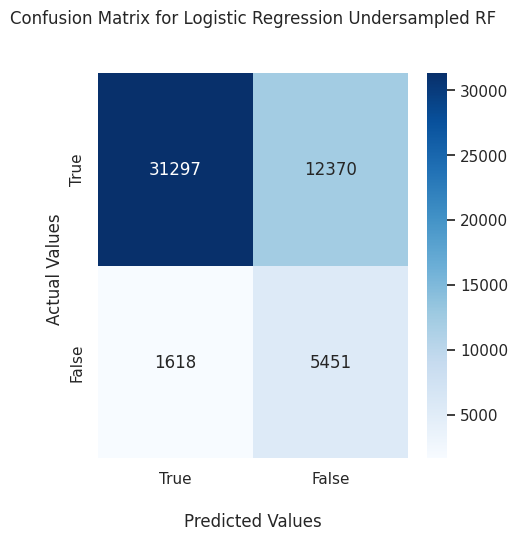

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when 

{'fit_time': array([ 94.26454806,  99.15653396,  96.72345257,  95.50028467,
       106.42565989]), 'score_time': array([0.12260771, 0.16032577, 0.06923246, 0.07407308, 0.07606936]), 'estimator': [MLPClassifier(hidden_layer_sizes=(16, 8), max_iter=1000), MLPClassifier(hidden_layer_sizes=(16, 8), max_iter=1000), MLPClassifier(hidden_layer_sizes=(16, 8), max_iter=1000), MLPClassifier(hidden_layer_sizes=(16, 8), max_iter=1000), MLPClassifier(hidden_layer_sizes=(16, 8), max_iter=1000)], 'test_accuracy': array([0.74476174, 0.74423128, 0.73379896, 0.73830784, 0.73103448]), 'test_f1': array([0.75015145, 0.75347252, 0.74588573, 0.73702914, 0.72805292]), 'test_recall': array([0.76640141, 0.78178603, 0.7812942 , 0.73338048, 0.72007073]), 'test_precision': array([0.73457627, 0.72713816, 0.71354755, 0.74071429, 0.73621407]), 'test_auc': array([0.74476365, 0.7442346 , 0.73379476, 0.73830828, 0.73103448])}
Best model based on F1 score: 1


<ipython-input-48-6dba2dc226f9>:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_results_cv_rf = test_results_cv_rf.append({'Model_test': name,
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-48-6dba2dc226f9>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_results_rf = train_results_rf.append({'Model_train_rf': name,
<ipython-input-48-6dba2dc226f9>:81: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_results_rf = test_results_rf.append({'Model_test_rf': name,


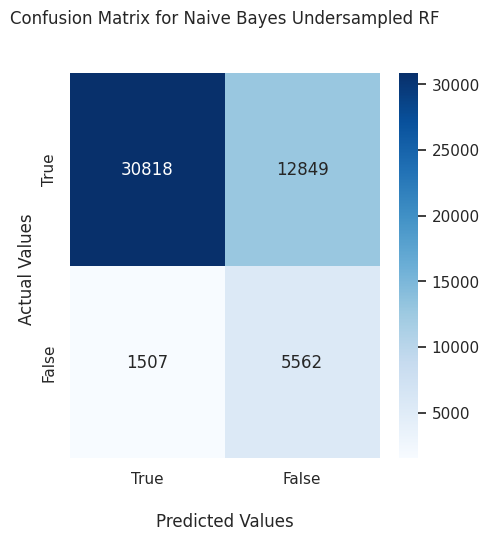

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when 

{'fit_time': array([ 88.45382857,  89.01275063, 119.70934772,  67.16710591,
       101.64512777]), 'score_time': array([0.07604837, 0.06833577, 0.08354306, 0.07070661, 0.06975317]), 'estimator': [MLPClassifier(hidden_layer_sizes=(16, 8), max_iter=1000), MLPClassifier(hidden_layer_sizes=(16, 8), max_iter=1000), MLPClassifier(hidden_layer_sizes=(16, 8), max_iter=1000), MLPClassifier(hidden_layer_sizes=(16, 8), max_iter=1000), MLPClassifier(hidden_layer_sizes=(16, 8), max_iter=1000)], 'test_accuracy': array([0.74431969, 0.74175581, 0.73574397, 0.74034126, 0.74518126]), 'test_f1': array([0.75429057, 0.74356948, 0.75465813, 0.74652628, 0.76240725]), 'test_recall': array([0.78496905, 0.74889478, 0.81276521, 0.76467468, 0.81768347]), 'test_precision': array([0.72591987, 0.73831939, 0.70430519, 0.72921936, 0.71413127]), 'test_auc': array([0.74432328, 0.74175644, 0.73573716, 0.74033911, 0.74518126])}
Best model based on F1 score: 4


<ipython-input-48-6dba2dc226f9>:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_results_cv_rf = test_results_cv_rf.append({'Model_test': name,
/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-48-6dba2dc226f9>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_results_rf = train_results_rf.append({'Model_train_rf': name,
<ipython-input-48-6dba2dc226f9>:81: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_results_rf = test_results_rf.append({'Model_test_rf': name,


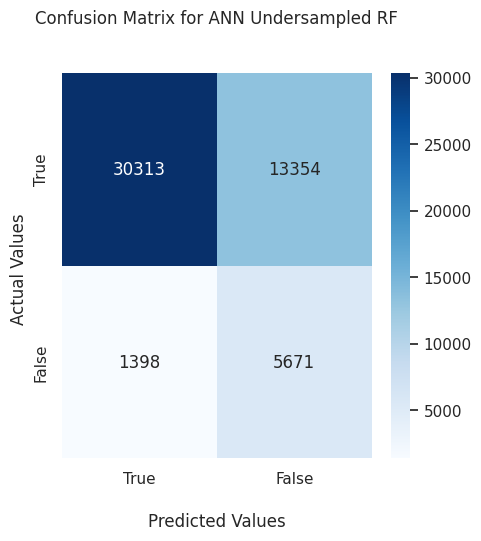

Training Results:
        Model_train_rf  Accuracy_train_rf  F1-score_train_rf  Recall_train_rf  \
0  Logistic Regression           0.750981           0.757887         0.779503   
1          Naive Bayes           0.753492           0.763178         0.794391   
2                  ANN           0.753581           0.765876         0.806097   

   Precision_train_rf  AUC_train_rf  
0            0.737437      0.750981  
1            0.734325      0.753492  
2            0.729478      0.753581  


Test Results:
         Model_test_rf  Accuracy_test_rf  F1-score_test_rf  Recall_test_rf  \
0  Logistic Regression          0.724298          0.438007        0.771113   
1          Naive Bayes          0.717045          0.436578        0.786816   
2                  ANN          0.709240          0.434659        0.802235   

   Precision_test_rf  AUC_test_rf  
0           0.305875     0.743917  
1           0.302102     0.746283  
2           0.298081     0.748210  


In [48]:
# define feature selection model
selection = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42),)

# fit feature selection model on resampled data
selection.fit(X_train_undersampled, y_train_undersampled)

# transform X_resampled and X_test with selected features
X_train_undersampled_selected = selection.transform(X_train_undersampled)
X_test_selected = selection.transform(X_test)


# define models
models_rf = {'Logistic Regression': LogisticRegression(max_iter=10000), 
          'Naive Bayes': GaussianNB(), 
          'ANN': MLPClassifier(hidden_layer_sizes=(16, 8), max_iter=1000)}

# evaluate models with cross-validation
metrics_rf = {'accuracy': make_scorer(accuracy_score),
           'f1': make_scorer(f1_score),
           'recall': make_scorer(recall_score),
           'precision': make_scorer(precision_score),
           'auc': make_scorer(roc_auc_score)}

# save train/test results
train_results_rf = pd.DataFrame(columns=['Model_train_rf', 'Accuracy_train_rf', 'F1-score_train_rf', 'Recall_train_rf', 'Precision_train_rf', 'AUC_train_rf'])
test_results_rf = pd.DataFrame(columns=['Model_test_rf', 'Accuracy_test_rf', 'F1-score_test_rf', 'Recall_test_rf', 'Precision_test_rf', 'AUC_test_rf'])
# save cv results
test_results_cv_rf = pd.DataFrame(columns=['Model_test_rf', 'Accuracy_test_rf', 'F1-score_test_rf', 'Recall_test_rf', 'Precision_test_rf', 'AUC_test_rf'])

for name, model_rf in models_rf.items():

    # perform cross validation
    cv_results_rf = cross_validate(model, X_train_undersampled, y_train_undersampled, cv=5, scoring=metrics, return_estimator=True)

    print(cv_results_rf)
    
    
    test_results_cv_rf = test_results_cv_rf.append({'Model_test': name, 
                                        'Accuracy_test': cv_results_rf['test_accuracy'].mean(), 
                                        'F1-score_test': cv_results_rf['test_f1'].mean(), 
                                        'Recall_test': cv_results_rf['test_recall'].mean(), 
                                        'Precision_test': cv_results_rf['test_precision'].mean(), 
                                        'AUC_test': cv_results_rf['test_auc'].mean()}, ignore_index=True)

    
    # select the best model based on the highest F1 score
    best_f1_model_rf = np.argmax(cv_results_rf['test_f1'])
    print("Best model based on F1 score:", best_f1_model_rf)

    # fit the best model on the entire training set
    best_model_rf = cv_results_rf['estimator'][best_f1_model_rf]
  
    # fit the model on the training set
    best_model_rf.fit(X_train_undersampled_selected, y_train_undersampled)
    
    # make predictions on the training and test sets
    y_train_pred_rf = best_model_rf.predict(X_train_undersampled_selected)
    y_test_pred_rf = best_model_rf.predict(X_test_selected)
    
    # calculate evaluation metrics on the training set
    train_accuracy = accuracy_score(y_train_undersampled, y_train_pred_rf)
    train_f1 = f1_score(y_train_undersampled, y_train_pred_rf)
    train_recall = recall_score(y_train_undersampled, y_train_pred_rf)
    train_precision = precision_score(y_train_undersampled, y_train_pred_rf)
    train_auc = roc_auc_score(y_train_undersampled, y_train_pred_rf)
    
    # calculate evaluation metrics on the test set
    test_accuracy = accuracy_score(y_test, y_test_pred_rf)
    test_f1 = f1_score(y_test, y_test_pred_rf)
    test_recall = recall_score(y_test, y_test_pred_rf)
    test_precision = precision_score(y_test, y_test_pred_rf)
    test_auc = roc_auc_score(y_test, y_test_pred_rf)
    
    # store results in dataframes
    train_results_rf = train_results_rf.append({'Model_train_rf': name, 
                                          'Accuracy_train_rf': train_accuracy, 
                                          'F1-score_train_rf': train_f1, 
                                          'Recall_train_rf': train_recall, 
                                          'Precision_train_rf': train_precision, 
                                          'AUC_train_rf': train_auc}, ignore_index=True)
    test_results_rf = test_results_rf.append({'Model_test_rf': name, 
                                        'Accuracy_test_rf': test_accuracy, 
                                        'F1-score_test_rf': test_f1, 
                                        'Recall_test_rf': test_recall, 
                                        'Precision_test_rf': test_precision, 
                                        'AUC_test_rf': test_auc}, ignore_index=True)
    
    confusion_matrix_plot(confusion_matrix(y_test, y_test_pred_rf), name+' Undersampled_RF', name+' Undersampled RF')

# print results
print("Training Results:")
print(train_results_rf)
print("\n")
print("Test Results:")
print(test_results_rf)


In [49]:
# #@title
# %%script echo skipping
# save RF model data to csv - google drive
train_results_rf.to_csv(main_dir + 'train_results_under_rf', index = False)
test_results_rf.to_csv(main_dir + 'test_results_under_rf', index = False)


In [50]:
df_train_results_rf = train_results_rf.sort_values(by=['F1-score_train_rf'], ascending=[False])
df_test_results_rf = test_results_rf.sort_values(by=['F1-score_test_rf'], ascending=[False])

In [51]:
display(df_train_results_rf)

,Model_train_rf,Accuracy_train_rf,F1-score_train_rf,Recall_train_rf,Precision_train_rf,AUC_train_rf
2,ANN,0.753581,0.765876,0.806097,0.729478,0.753581
1,Naive Bayes,0.753492,0.763178,0.794391,0.734325,0.753492
0,Logistic Regression,0.750981,0.757887,0.779503,0.737437,0.750981


In [52]:
display(df_test_results_rf)

,Model_test_rf,Accuracy_test_rf,F1-score_test_rf,Recall_test_rf,Precision_test_rf,AUC_test_rf
0,Logistic Regression,0.724298,0.438007,0.771113,0.305875,0.743917
1,Naive Bayes,0.717045,0.436578,0.786816,0.302102,0.746283
2,ANN,0.709240,0.434659,0.802235,0.298081,0.748210


## c. Feature Importance with Random Forest Feature Engineering on Unsampling

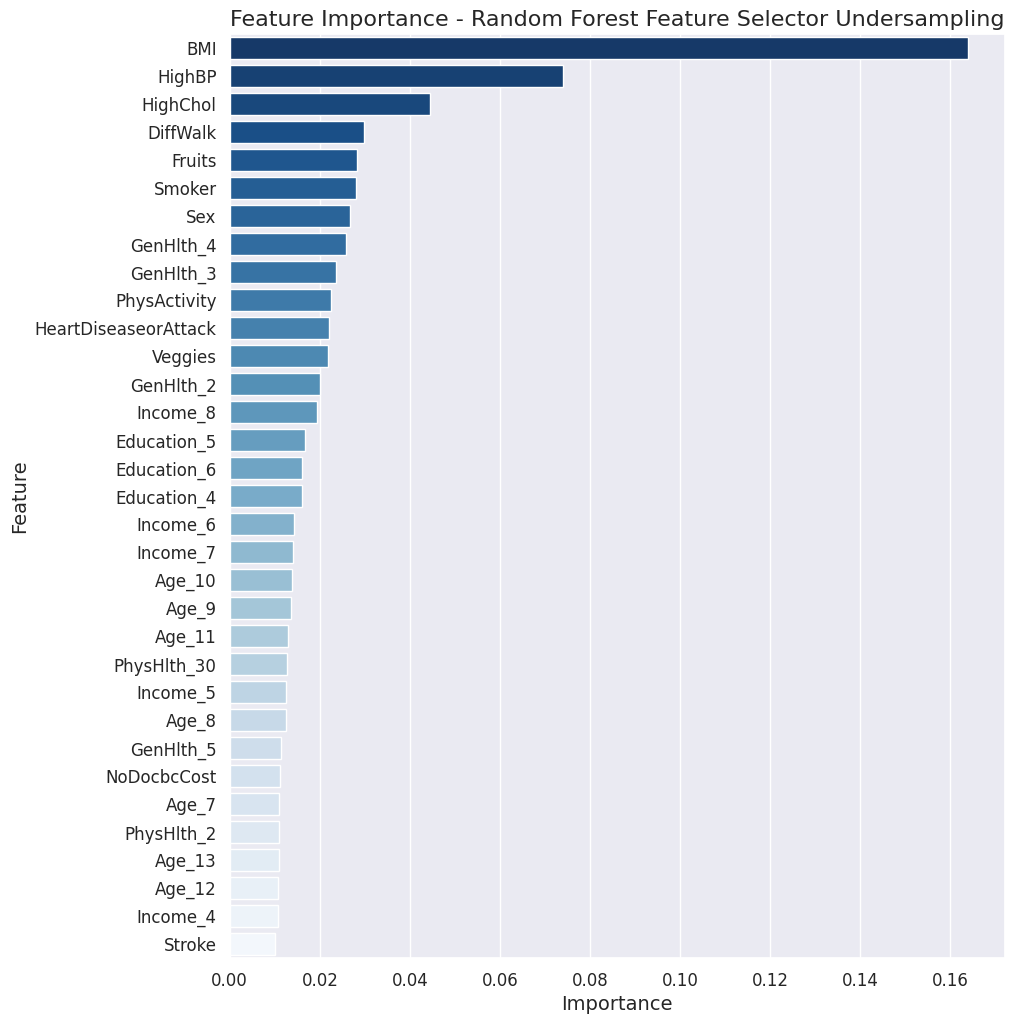

Number of features before selection: 103
Number of features after selection: 33


In [57]:

# extract selected features and their indices
selected_features = X_train_undersampled.columns[selection.get_support()]
selected_indices = selection.get_support(indices=True)


# extract feature importance
feature_importance = selection.estimator_.feature_importances_


# create a DataFrame with selected features and their importance
df_importance = pd.DataFrame({'Feature': selected_features, 'Importance': feature_importance[selected_indices]})
df_importance = df_importance.sort_values(by='Importance', ascending=False)

# plot feature importance using seaborn
plt.figure(figsize=(10, 12))
sns.barplot(x='Importance', y='Feature', data=df_importance, palette='Blues_r')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.title('Feature Importance - Random Forest Feature Selector Undersampling', fontsize=16)
plt.savefig(images_dir + "feature_importance_undersampling_rf.png", dpi=300, bbox_inches='tight')
plt.show()


# print the number of features before and after selection
print("Number of features before selection:", X_train_undersampled.shape[1])
print("Number of features after selection:", len(selected_features))

## d. SMOTE sampling



In [85]:
# balance dataset with SMOTE
sm = SMOTE(random_state=42)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

# save Smote splits
X_train_smote = pd.DataFrame(X_train_smote)
X_train_smote.to_csv(main_dir + "/X_train_smote.csv", index=False)

y_train_smote = pd.DataFrame(y_train_smote)
y_train_smote.to_csv(main_dir + "/y_train_smote.csv", index=False)
# convert to 2d array
y_train_smote = np.ravel(y_train_smote)

{'fit_time': array([44.83650088, 29.85167599, 36.1870172 , 35.50578356, 36.19949102]), 'score_time': array([0.18100882, 0.17425895, 0.16792226, 0.17225266, 0.28061604]), 'estimator': [LogisticRegression(max_iter=10000), LogisticRegression(max_iter=10000), LogisticRegression(max_iter=10000), LogisticRegression(max_iter=10000), LogisticRegression(max_iter=10000)], 'test_accuracy': array([0.66177165, 0.81444745, 0.81433295, 0.81141311, 0.81308505]), 'test_f1': array([0.59944063, 0.82042829, 0.81982332, 0.81749176, 0.81809698]), 'test_recall': array([0.50616895, 0.84776572, 0.84479304, 0.84470716, 0.84063779]), 'test_precision': array([0.73485163, 0.79479885, 0.7962873 , 0.79197531, 0.79673341]), 'test_auc': array([0.66176942, 0.81444793, 0.81433251, 0.81141264, 0.81308505])}
Best model based on F1 score: 1


<ipython-input-87-03c965aadb57>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_results_cv_smote = test_results_cv_smote.append({'Model_test': name,
<ipython-input-87-03c965aadb57>:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_results_smote = train_results_smote.append({'Model_train_Smote': name,
<ipython-input-87-03c965aadb57>:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_results_smote = test_results_smote.append({'Model_test_Smote': name,


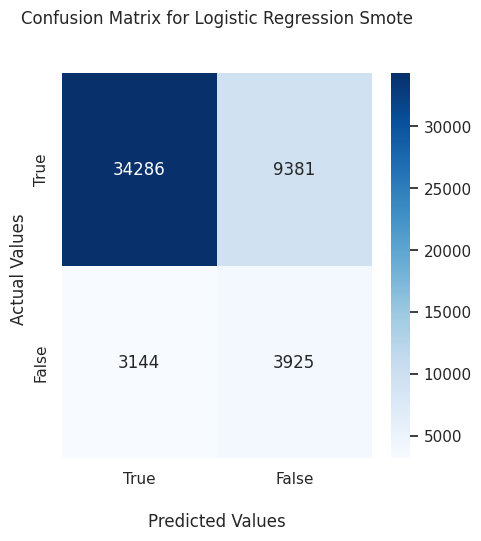

{'fit_time': array([0.96848059, 1.02269816, 1.10343099, 1.66568995, 1.22905922]), 'score_time': array([0.24293137, 0.27790666, 0.29931784, 0.37885547, 0.30185223]), 'estimator': [GaussianNB(), GaussianNB(), GaussianNB(), GaussianNB(), GaussianNB()], 'test_accuracy': array([0.54731132, 0.67652826, 0.67478209, 0.67340805, 0.67506369]), 'test_f1': array([0.66334568, 0.74769464, 0.74691468, 0.74582841, 0.74706983]), 'test_recall': array([0.89199324, 0.95860648, 0.9597813 , 0.95832141, 0.95975152]), 'test_precision': array([0.52800136, 0.61285482, 0.61132991, 0.61046681, 0.6115499 ]), 'test_auc': array([0.54731625, 0.6765323 , 0.67477801, 0.67340397, 0.67506369])}
Best model based on F1 score: 1


<ipython-input-87-03c965aadb57>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_results_cv_smote = test_results_cv_smote.append({'Model_test': name,
<ipython-input-87-03c965aadb57>:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_results_smote = train_results_smote.append({'Model_train_Smote': name,
<ipython-input-87-03c965aadb57>:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_results_smote = test_results_smote.append({'Model_test_Smote': name,


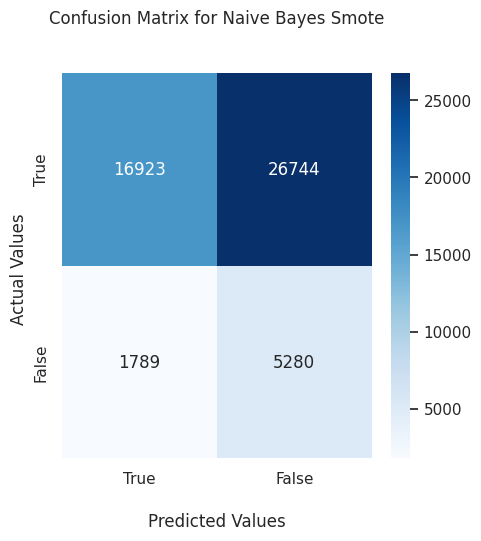

{'fit_time': array([331.68497944, 442.91306543, 328.34898543, 308.88118911,
       374.40889573]), 'score_time': array([0.45551229, 0.44822621, 0.24427485, 0.26321697, 0.22654915]), 'estimator': [MLPClassifier(hidden_layer_sizes=(16, 8), max_iter=1000), MLPClassifier(hidden_layer_sizes=(16, 8), max_iter=1000), MLPClassifier(hidden_layer_sizes=(16, 8), max_iter=1000), MLPClassifier(hidden_layer_sizes=(16, 8), max_iter=1000), MLPClassifier(hidden_layer_sizes=(16, 8), max_iter=1000)], 'test_accuracy': array([0.65274021, 0.83358381, 0.83226702, 0.83042066, 0.83525606]), 'test_f1': array([0.58151649, 0.84291022, 0.83983654, 0.83941012, 0.83942074]), 'test_recall': array([0.48255231, 0.89296654, 0.87951566, 0.88638576, 0.86119142]), 'test_precision': array([0.73154537, 0.79816795, 0.8035831 , 0.79716301, 0.81872364]), 'test_auc': array([0.65273777, 0.83358466, 0.83226635, 0.83041986, 0.83525606])}
Best model based on F1 score: 1


<ipython-input-87-03c965aadb57>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_results_cv_smote = test_results_cv_smote.append({'Model_test': name,
<ipython-input-87-03c965aadb57>:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_results_smote = train_results_smote.append({'Model_train_Smote': name,
<ipython-input-87-03c965aadb57>:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_results_smote = test_results_smote.append({'Model_test_Smote': name,


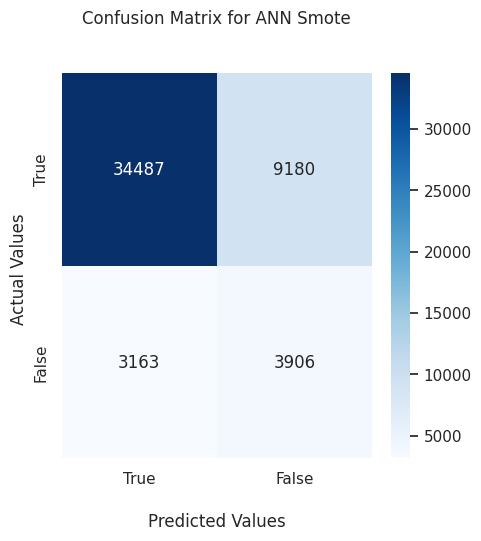

Training Results:
     Model_train_Smote  Accuracy_train_Smote  F1-score_train_Smote  \
0  Logistic Regression              0.793707              0.794629   
1          Naive Bayes              0.657176              0.729587   
2                  ANN              0.813262              0.816580   

   Recall_train_Smote  Precision_train_Smote  AUC_train_Smote  
0            0.798193               0.791096         0.793707  
1            0.924954               0.602358         0.657176  
2            0.831353               0.802323         0.813262  


Test Results:
      Model_test_Smote  Accuracy_test_Smote  F1-score_test_Smote  \
0  Logistic Regression             0.753134             0.385276   
1          Naive Bayes             0.437618             0.270125   
2                  ANN             0.756721             0.387596   

   Recall_test_Smote  Precision_test_Smote  AUC_test_Smote  
0           0.555241              0.294980        0.670205  
1           0.746923              

In [87]:
# define models
models = {'Logistic Regression': LogisticRegression(max_iter=10000),
          'Naive Bayes': GaussianNB(), 
          'ANN': MLPClassifier(hidden_layer_sizes=(16, 8), max_iter=1000)}

# evaluate models with cross-validation
metrics = {'accuracy': make_scorer(accuracy_score),
           'f1': make_scorer(f1_score),
           'recall': make_scorer(recall_score),
           'precision': make_scorer(precision_score),
           'auc': make_scorer(roc_auc_score)}


# save train/test results
train_results_smote = pd.DataFrame(columns=['Model_train_Smote', 'Accuracy_train_Smote', 'F1-score_train_Smote', 'Recall_train_Smote', 'Precision_train_Smote', 'AUC_train_Smote'])
test_results_smote = pd.DataFrame(columns=['Model_test_Smote', 'Accuracy_test_Smote', 'F1-score_test_Smote', 'Recall_test_Smote', 'Precision_test_Smote', 'AUC_test_Smote'])
# save cv results
test_results_cv_smote = pd.DataFrame(columns=['Model_test_Smote', 'Accuracy_test_Smote', 'F1-score_test_Smote', 'Recall_test_Smote', 'Precision_test_Smote', 'AUC_test_Smote'])


for name, model in models.items():
  # perform cross validation
    cv_results_smote = cross_validate(model, X_train_smote, y_train_smote, cv=5, scoring=metrics, return_estimator=True)
    print(cv_results_smote)
    # put metrics to pd.DF
    test_results_cv_smote = test_results_cv_smote.append({'Model_test': name, 
                                        'Accuracy_test': cv_results_smote['test_accuracy'].mean(), 
                                        'F1-score_test': cv_results_smote['test_f1'].mean(), 
                                        'Recall_test': cv_results_smote['test_recall'].mean(), 
                                        'Precision_test': cv_results_smote['test_precision'].mean(), 
                                        'AUC_test': cv_results_smote['test_auc'].mean()}, ignore_index=True)


    
    # select the best model based on the highest F1 score
    best_f1_model_smote= np.argmax(cv_results_smote['test_f1'])
    print("Best model based on F1 score:", best_f1_model_smote)

    # fit the best model on the entire training set
    best_model_smote = cv_results_smote['estimator'][best_f1_model_smote]
    # fit the model on the training set
    
    best_model_smote.fit(X_train_smote, y_train_smote)
    
    # make predictions on the training and test sets
    y_train_pred_smote = best_model_smote.predict(X_train_smote)
    y_test_pred_smote = best_model_smote.predict(X_test)
    
    # calculate evaluation metrics on the training set
    train_accuracy = accuracy_score(y_train_smote, y_train_pred_smote)
    train_f1 = f1_score(y_train_smote, y_train_pred_smote)
    train_recall = recall_score(y_train_smote, y_train_pred_smote)
    train_precision = precision_score(y_train_smote, y_train_pred_smote)
    train_auc = roc_auc_score(y_train_smote, y_train_pred_smote)
    
    # calculate evaluation metrics on the test set
    test_accuracy = accuracy_score(y_test, y_test_pred_smote)
    test_f1 = f1_score(y_test, y_test_pred_smote)
    test_recall = recall_score(y_test, y_test_pred_smote)
    test_precision = precision_score(y_test, y_test_pred_smote)
    test_auc = roc_auc_score(y_test, y_test_pred_smote)
    
    # store results in dataframes
    train_results_smote = train_results_smote.append({'Model_train_Smote': name, 
                                          'Accuracy_train_Smote': train_accuracy, 
                                          'F1-score_train_Smote': train_f1, 
                                          'Recall_train_Smote': train_recall, 
                                          'Precision_train_Smote': train_precision, 
                                          'AUC_train_Smote': train_auc}, ignore_index=True)
    test_results_smote = test_results_smote.append({'Model_test_Smote': name, 
                                        'Accuracy_test_Smote': test_accuracy, 
                                        'F1-score_test_Smote': test_f1, 
                                        'Recall_test_Smote': test_recall, 
                                        'Precision_test_Smote': test_precision, 
                                        'AUC_test_Smote': test_auc}, ignore_index=True)
    
    confusion_matrix_plot(confusion_matrix(y_test, y_test_pred_smote), name+' Smote', name+' Smote')

# print results
print("Training Results:")
print(train_results_smote)
print("\n")
print("Test Results:")
print(test_results_smote)

In [88]:
df_train_results_smote = train_results_smote.sort_values(by=['F1-score_train_Smote'], ascending=[False])
df_test_results_smote = test_results_smote.sort_values(by=['F1-score_test_Smote'], ascending=[False])

In [89]:
display(df_train_results_smote)

,Model_train_Smote,Accuracy_train_Smote,F1-score_train_Smote,Recall_train_Smote,Precision_train_Smote,AUC_train_Smote
2,ANN,0.813262,0.816580,0.831353,0.802323,0.813262
0,Logistic Regression,0.793707,0.794629,0.798193,0.791096,0.793707
1,Naive Bayes,0.657176,0.729587,0.924954,0.602358,0.657176


In [90]:
display(df_test_results_smote)

,Model_test_Smote,Accuracy_test_Smote,F1-score_test_Smote,Recall_test_Smote,Precision_test_Smote,AUC_test_Smote
2,ANN,0.756721,0.387596,0.552553,0.298487,0.671163
0,Logistic Regression,0.753134,0.385276,0.555241,0.294980,0.670205
1,Naive Bayes,0.437618,0.270125,0.746923,0.164876,0.567235


In [91]:
# #@title
# %%script echo skipping
# save model data to csv - google drive
df_train_results_smote.to_csv(main_dir + 'train_results_smote', index = False)
df_test_results_smote.to_csv(main_dir + 'test_results_smote', index = False)

## e. SMOTE With Random Forest Feature Engineering

{'fit_time': array([4.20100927, 2.20284748, 2.07191563, 2.28373551, 2.35697365]), 'score_time': array([0.14851952, 0.15345669, 0.13847637, 0.1383543 , 0.14229631]), 'estimator': [LogisticRegression(max_iter=10000), LogisticRegression(max_iter=10000), LogisticRegression(max_iter=10000), LogisticRegression(max_iter=10000), LogisticRegression(max_iter=10000)], 'test_accuracy': array([0.72766828, 0.73963388, 0.74046402, 0.73886098, 0.73942977]), 'test_f1': array([0.72815853, 0.74456224, 0.74515481, 0.74353027, 0.74330593]), 'test_recall': array([0.72948215, 0.75893854, 0.75885956, 0.75705616, 0.7545301 ]), 'test_precision': array([0.7268397 , 0.73072047, 0.73193628, 0.73047922, 0.7324108 ]), 'test_auc': array([0.72766831, 0.73963415, 0.74046376, 0.73886072, 0.73942977])}
Best model based on F1 score: 2


<ipython-input-95-5bc94114fda5>:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_results_cv_rf_smote = test_results_cv_rf_smote.append({'Model_test': name,
<ipython-input-95-5bc94114fda5>:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_results_rf_smote = train_results_rf_smote.append({'Model_train_rf_Smote': name,
<ipython-input-95-5bc94114fda5>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_results_rf_smote = test_results_rf_smote.append({'Model_test_rf_Smote': name,


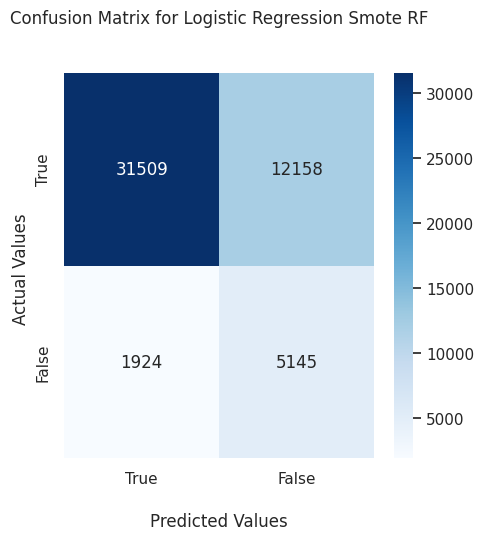

{'fit_time': array([0.20767045, 0.19194412, 0.18937111, 0.19324255, 0.19375682]), 'score_time': array([0.12669492, 0.1154387 , 0.11639118, 0.12189126, 0.12568808]), 'estimator': [GaussianNB(), GaussianNB(), GaussianNB(), GaussianNB(), GaussianNB()], 'test_accuracy': array([0.66129933, 0.69295948, 0.69454821, 0.69451959, 0.69332723]), 'test_f1': array([0.7296408 , 0.74445477, 0.74613088, 0.74614332, 0.7446002 ]), 'test_recall': array([0.91409269, 0.89448373, 0.89772142, 0.89786454, 0.89408296]), 'test_precision': array([0.60712996, 0.63752474, 0.63833988, 0.63828575, 0.63794195]), 'test_auc': array([0.66130294, 0.69296236, 0.6945453 , 0.69451668, 0.69332723])}
Best model based on F1 score: 3


<ipython-input-95-5bc94114fda5>:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_results_cv_rf_smote = test_results_cv_rf_smote.append({'Model_test': name,
<ipython-input-95-5bc94114fda5>:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_results_rf_smote = train_results_rf_smote.append({'Model_train_rf_Smote': name,
<ipython-input-95-5bc94114fda5>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_results_rf_smote = test_results_rf_smote.append({'Model_test_rf_Smote': name,


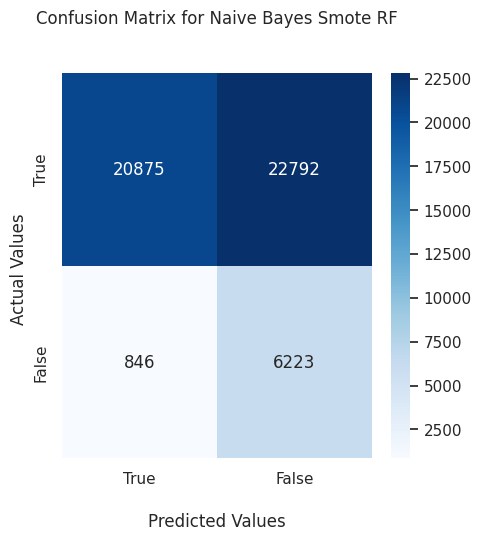

{'fit_time': array([87.64986467, 54.34837747, 97.09416795, 64.19800472, 62.00034332]), 'score_time': array([0.18496132, 0.27365541, 0.29228115, 0.30482626, 0.17782068]), 'estimator': [MLPClassifier(hidden_layer_sizes=(16, 8), max_iter=1000), MLPClassifier(hidden_layer_sizes=(16, 8), max_iter=1000), MLPClassifier(hidden_layer_sizes=(16, 8), max_iter=1000), MLPClassifier(hidden_layer_sizes=(16, 8), max_iter=1000), MLPClassifier(hidden_layer_sizes=(16, 8), max_iter=1000)], 'test_accuracy': array([0.72537822, 0.75689524, 0.75832653, 0.75530651, 0.7562763 ]), 'test_f1': array([0.72575504, 0.76267658, 0.76702311, 0.76948385, 0.76575139]), 'test_recall': array([0.72676266, 0.781267  , 0.79564321, 0.81679739, 0.79672516]), 'test_precision': array([0.72475021, 0.74495032, 0.74039051, 0.72735152, 0.73709579]), 'test_auc': array([0.72537824, 0.75689559, 0.758326  , 0.75530563, 0.7562763 ])}
Best model based on F1 score: 3


<ipython-input-95-5bc94114fda5>:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_results_cv_rf_smote = test_results_cv_rf_smote.append({'Model_test': name,
<ipython-input-95-5bc94114fda5>:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_results_rf_smote = train_results_rf_smote.append({'Model_train_rf_Smote': name,
<ipython-input-95-5bc94114fda5>:79: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_results_rf_smote = test_results_rf_smote.append({'Model_test_rf_Smote': name,


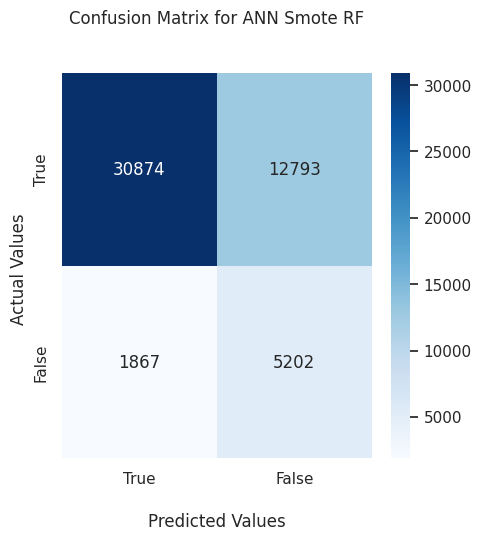

Training Results:
  Model_train_rf_Smote  Accuracy_train_rf_Smote  F1-score_train_rf_Smote  \
0  Logistic Regression                 0.738408                 0.742500   
1          Naive Bayes                 0.689420                 0.743457   
2                  ANN                 0.755340                 0.766129   

   Recall_train_rf_Smote  Precision_train_rf_Smote  AUC_train_rf_Smote  
0               0.754298                  0.731065            0.738408  
1               0.900056                  0.633275            0.689420  
2               0.801474                  0.733771            0.755340  


Test Results:
   Model_test_rf_Smote Accuracy_test_rf_Smote  F1-score_test_rf_Smote  \
0  Logistic Regression                    NaN                0.422206   
1          Naive Bayes                    NaN                0.344917   
2                  ANN                    NaN                0.415097   

   Recall_test_rf_Smote  Precision_test_rf_Smote  AUC_test_rf_Smote  \
0    

In [95]:
# define feature selection model
selection_smote_rf = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42))

# fit feature selection model on resampled data
selection_smote_rf.fit(X_train_smote, y_train_smote)

# transform X_resampled and X_test with selected features
X_train_selected_smote = selection_smote_rf.transform(X_train_smote)
X_test_selected_smote = selection_smote_rf.transform(X_test)


# define models
models_rf_smote = {'Logistic Regression': LogisticRegression(max_iter=10000), 
          'Naive Bayes': GaussianNB(), 
          'ANN': MLPClassifier(hidden_layer_sizes=(16, 8), max_iter=1000)}

# evaluate models with cross-validation
metrics_rf_smote = {'accuracy': make_scorer(accuracy_score),
           'f1': make_scorer(f1_score),
           'recall': make_scorer(recall_score),
           'precision': make_scorer(precision_score),
           'auc': make_scorer(roc_auc_score)}

# save train/test results
train_results_rf_smote = pd.DataFrame(columns=['Model_train_rf_Smote', 'Accuracy_train_rf_Smote', 'F1-score_train_rf_Smote', 'Recall_train_rf_Smote', 'Precision_train_rf_Smote', 'AUC_train_rf_Smote'])
test_results_rf_smote = pd.DataFrame(columns=['Model_test_rf_Smote', 'Accuracy_test_rf_Smote', 'F1-score_test_rf_Smote', 'Recall_test_rf_Smote', 'Precision_test_rf_Smote', 'AUC_test_rf_Smote'])
# save cv results
test_results_cv_rf_smote = pd.DataFrame(columns=['Model_test_rf_Smote', 'Accuracy_test_rf_Smote', 'F1-score_test_rf_Smote', 'Recall_test_rf_Smote', 'Precision_test_rf_Smote', 'AUC_test_rf_Smote'])

for name, model_rf_smote in models_rf_smote.items():
  # perform cross validation
    cv_results_rf_smote = cross_validate(model_rf_smote, X_train_selected_smote, y_train_smote, cv=5, scoring=metrics, return_estimator=True)

    print(cv_results_rf_smote)
    
    
    test_results_cv_rf_smote = test_results_cv_rf_smote.append({'Model_test': name, 
                                        'Accuracy_test': cv_results_rf_smote['test_accuracy'].mean(), 
                                        'F1-score_test': cv_results_rf_smote['test_f1'].mean(), 
                                        'Recall_test': cv_results_rf_smote['test_recall'].mean(), 
                                        'Precision_test': cv_results_rf_smote['test_precision'].mean(), 
                                        'AUC_test': cv_results_rf_smote['test_auc'].mean()}, ignore_index=True)

    
    # select the best model based on the highest F1 score
    best_f1_model_rf_smote = np.argmax(cv_results_rf_smote['test_f1'])
    print("Best model based on F1 score:", best_f1_model_rf_smote)

    # fit the best model on the entire training set
    best_model_rf_smote = cv_results_rf_smote['estimator'][best_f1_model_rf_smote]
    # fit the model on the training set
    best_model_rf_smote.fit(X_train_selected_smote, y_train_smote)
    
    # make predictions on the training and test sets
    y_train_pred_rf_smote = best_model_rf_smote.predict(X_train_selected_smote)
    y_test_pred_rf_smote = best_model_rf_smote.predict(X_test_selected_smote)
    
    # calculate evaluation metrics on the training set
    train_accuracy = accuracy_score(y_train_smote, y_train_pred_rf_smote)
    train_f1 = f1_score(y_train_smote, y_train_pred_rf_smote)
    train_recall = recall_score(y_train_smote, y_train_pred_rf_smote)
    train_precision = precision_score(y_train_smote, y_train_pred_rf_smote)
    train_auc = roc_auc_score(y_train_smote, y_train_pred_rf_smote)
    
    # calculate evaluation metrics on the test set
    test_accuracy = accuracy_score(y_test, y_test_pred_rf_smote)
    test_f1 = f1_score(y_test, y_test_pred_rf_smote)
    test_recall = recall_score(y_test, y_test_pred_rf_smote)
    test_precision = precision_score(y_test, y_test_pred_rf_smote)
    test_auc = roc_auc_score(y_test, y_test_pred_rf_smote)
    
    # store results in dataframes
    train_results_rf_smote = train_results_rf_smote.append({'Model_train_rf_Smote': name, 
                                          'Accuracy_train_rf_Smote': train_accuracy, 
                                          'F1-score_train_rf_Smote': train_f1, 
                                          'Recall_train_rf_Smote': train_recall, 
                                          'Precision_train_rf_Smote': train_precision, 
                                          'AUC_train_rf_Smote': train_auc}, ignore_index=True)
    test_results_rf_smote = test_results_rf_smote.append({'Model_test_rf_Smote': name, 
                                        'Accuracy_test_rf_smote': test_accuracy, 
                                        'F1-score_test_rf_Smote': test_f1, 
                                        'Recall_test_rf_Smote': test_recall, 
                                        'Precision_test_rf_Smote': test_precision, 
                                        'AUC_test_rf_Smote': test_auc}, ignore_index=True)
    
    confusion_matrix_plot(confusion_matrix(y_test, y_test_pred_rf_smote), name+' Smote_RF', name+' Smote RF')

# print results
print("Training Results:")
print(train_results_rf_smote)
print("\n")
print("Test Results:")
print(test_results_rf_smote)


In [96]:
df_train_results_rf_smote = train_results_rf_smote.sort_values(by=['Recall_train_rf_Smote'], ascending=[False])
df_test_results_rf_smote = test_results_rf_smote.sort_values(by=['Recall_test_rf_Smote'], ascending=[False])

In [97]:
display(df_train_results_rf_smote)

,Model_train_rf_Smote,Accuracy_train_rf_Smote,F1-score_train_rf_Smote,Recall_train_rf_Smote,Precision_train_rf_Smote,AUC_train_rf_Smote
1,Naive Bayes,0.689420,0.743457,0.900056,0.633275,0.689420
2,ANN,0.755340,0.766129,0.801474,0.733771,0.755340
0,Logistic Regression,0.738408,0.742500,0.754298,0.731065,0.738408


In [100]:
display(df_test_results_rf_smote)

,Model_test_rf_Smote,Accuracy_test_rf_Smote,F1-score_test_rf_Smote,Recall_test_rf_Smote,Precision_test_rf_Smote,AUC_test_rf_Smote,Accuracy_test_rf_smote
1,Naive Bayes,NaN,0.344917,0.880323,0.214475,0.679186,0.534098
2,ANN,NaN,0.415097,0.735889,0.289080,0.721461,0.711053
0,Logistic Regression,NaN,0.422206,0.727826,0.297347,0.724700,0.722446


## f. Feature Importance after Random Forest with Smote Sampling

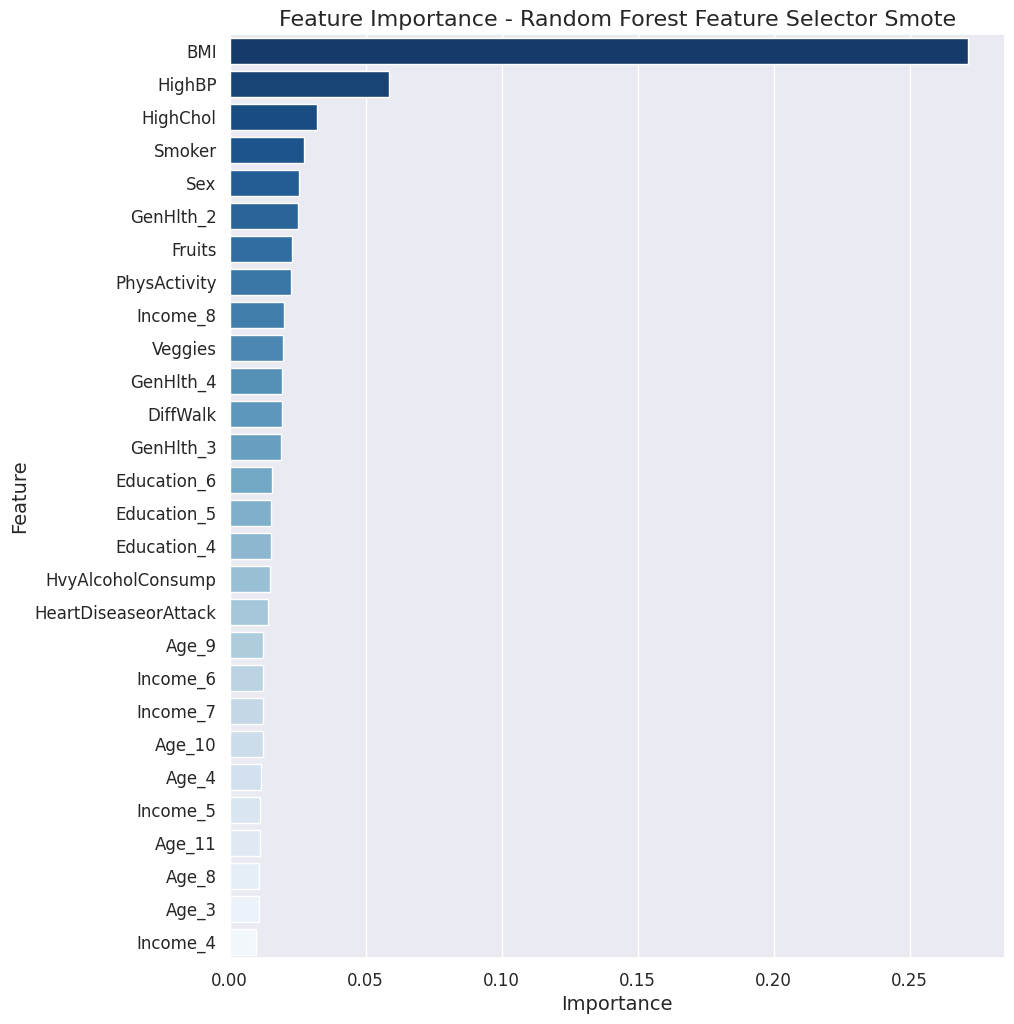

Number of features before selection: 103
Number of features after selection: 28


In [102]:
import seaborn as sns
import matplotlib.pyplot as plt

# extract selected features and their indices
selected_features = X_train_smote.columns[selection_smote_rf.get_support()]
selected_indices = selection_smote_rf.get_support(indices=True)

# extract feature importance
feature_importance = selection_smote_rf.estimator_.feature_importances_


# create a DataFrame with selected features and their importance
df_importance = pd.DataFrame({'Feature': selected_features, 'Importance': feature_importance[selected_indices]})
df_importance = df_importance.sort_values(by='Importance', ascending=False)

# plot feature importance using seaborn
plt.figure(figsize=(10, 12))
sns.barplot(x='Importance', y='Feature', data=df_importance, palette='Blues_r')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.title('Feature Importance - Random Forest Feature Selector Smote', fontsize=16)
plt.savefig(images_dir + "feature_importance_smote_rf.png", dpi=300, bbox_inches='tight')
plt.show()



# print the number of features before and after selection
print("Number of features before selection:", X_train_smote.shape[1])
print("Number of features after selection:", len(selected_features))

In [103]:
# #@title
# %%script echo skipping
# save model data to csv - google drive
df_train_results_rf_smote.to_csv(main_dir + 'train_results_rf_smote', index = False)
df_test_results_rf_smote.to_csv(main_dir + 'test_results_rf_smote', index = False)